In [1]:
!brew install asymptote.rb
%install_ext https://raw.github.com/jrjohansson/ipython-asymptote/master/asymptote.py
%install_ext https://raw.githubusercontent.com/mkrphys/ipython-tikzmagic/master/tikzmagic.py
!pip install --upgrade --no-cache-dir pip
!pip install --upgrade --no-cache-dir pyparsing
!pip install --upgrade --no-cache-dir Wand
!brew install imagemagick

==> Downloading http://downloads.sourceforge.net/asymptote/asymptote-2.35.src.tg
Already downloaded: /Library/Caches/Homebrew/asymptote-2.35.tgz
==> ./configure --prefix=/usr/local/Cellar/asymptote/2.35 --enable-gc=/usr/local
==> make install
pdflatex asy-latex.dtx
make[1]: pdflatex: No such file or directory
make[1]: *** [asy-latex.pdf] Error 1
make: *** [sty] Error 2
make: *** Waiting for unfinished jobs....

READ THIS: https://git.io/brew-troubleshooting

Installed asymptote.py. To use it, type:
  %load_ext asymptote
Installed tikzmagic.py. To use it, type:
  %load_ext tikzmagic
Requirement already up-to-date: pip in /usr/local/lib/python2.7/site-packages
Requirement already up-to-date: pyparsing in /usr/local/lib/python2.7/site-packages
Requirement already up-to-date: Wand in /usr/local/lib/python2.7/site-packages


/usr/local/lib/python2.7/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension(s)as a python packages.
  "as a python packages.", UserWarning)


In [2]:
%reload_ext asymptote
%reload_ext tikzmagic
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from math import sqrt
import pydot
from wand.image import Image as WImage

Couldn't import dot_parser, loading of dot files will not be possible.


<a id="fig:weltkugel"></a>
**Abbildung: Schematische Darstellung der Weltkugel**

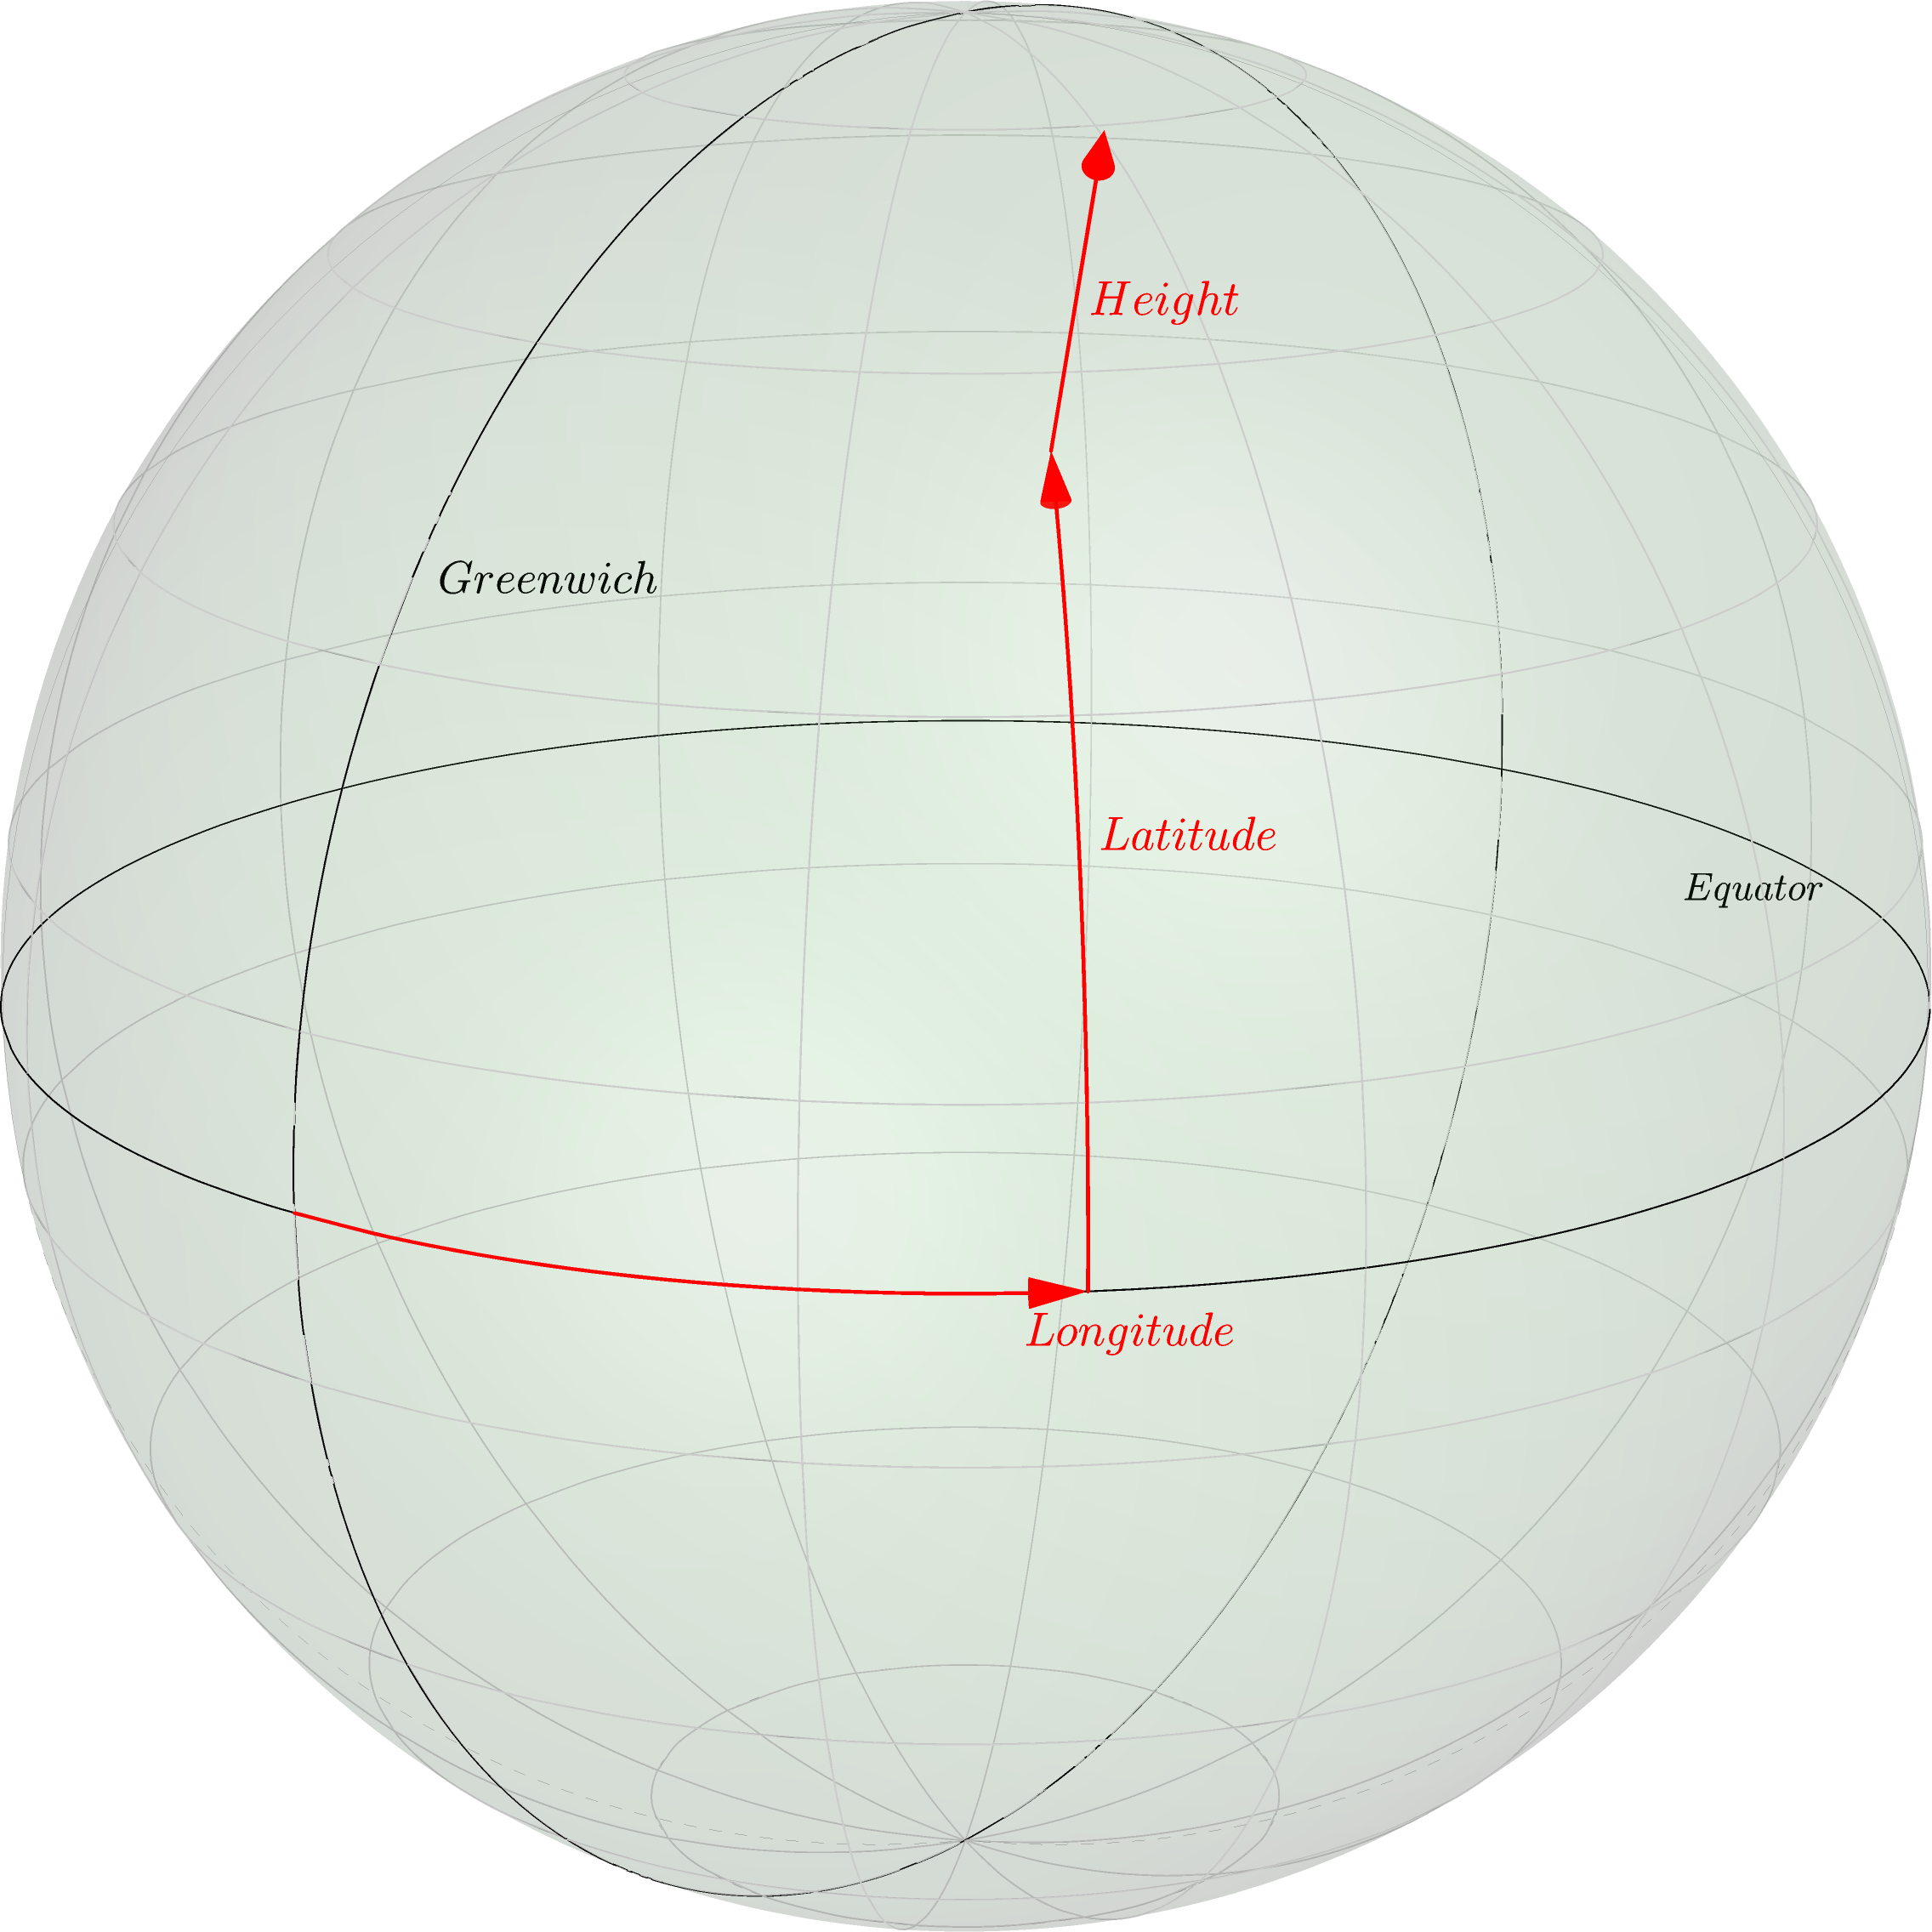

In [3]:
%%asy --root Images/world_coordinatesystem
settings.render = 4;
import three;
import graph3;
import solids;

size(20cm,0);
texpreamble("\usepackage[setpagesize=false]{hyperref}");

real RE = 1;
revolution Earth=sphere(O, RE, 9);

draw(surface(Earth),surfacepen=white+green+opacity(.1), meshpen=0.8*white + linewidth(0.5pt));
draw(Earth,m=10,0.6*white);

draw(rotate(-35,Y) * rotate(90,X) * path3(unitcircle), black, L=Label("$Greenwich$", position=EndPoint, align=(2,0)));
draw(rotate(-35,Z) * path3(unitcircle), black, L=Label("$Equator$", position=MidPoint, align=(-2,0)));

draw(rotate(45, Z) * rotate(45, Y) * (Z--1.5Z), red + linewidth(1.0pt), Arrow3(emissive(red)), L=Label("$Height$"));
draw(path3(arc((0,0),1,0,45)), red + linewidth(1.0pt), arrow=Arrow3(emissive(red)), L=Label("$Longitude$", position=EndPoint, align=(0.5,-1.5)));
draw(rotate(45,Z) * rotate(90,X) * path3(arc((0,0),1,0,45)), red + linewidth(1.0pt), arrow=Arrow3(emissive(red)), L=Label("$Latitude$", align=(1.5,1)));

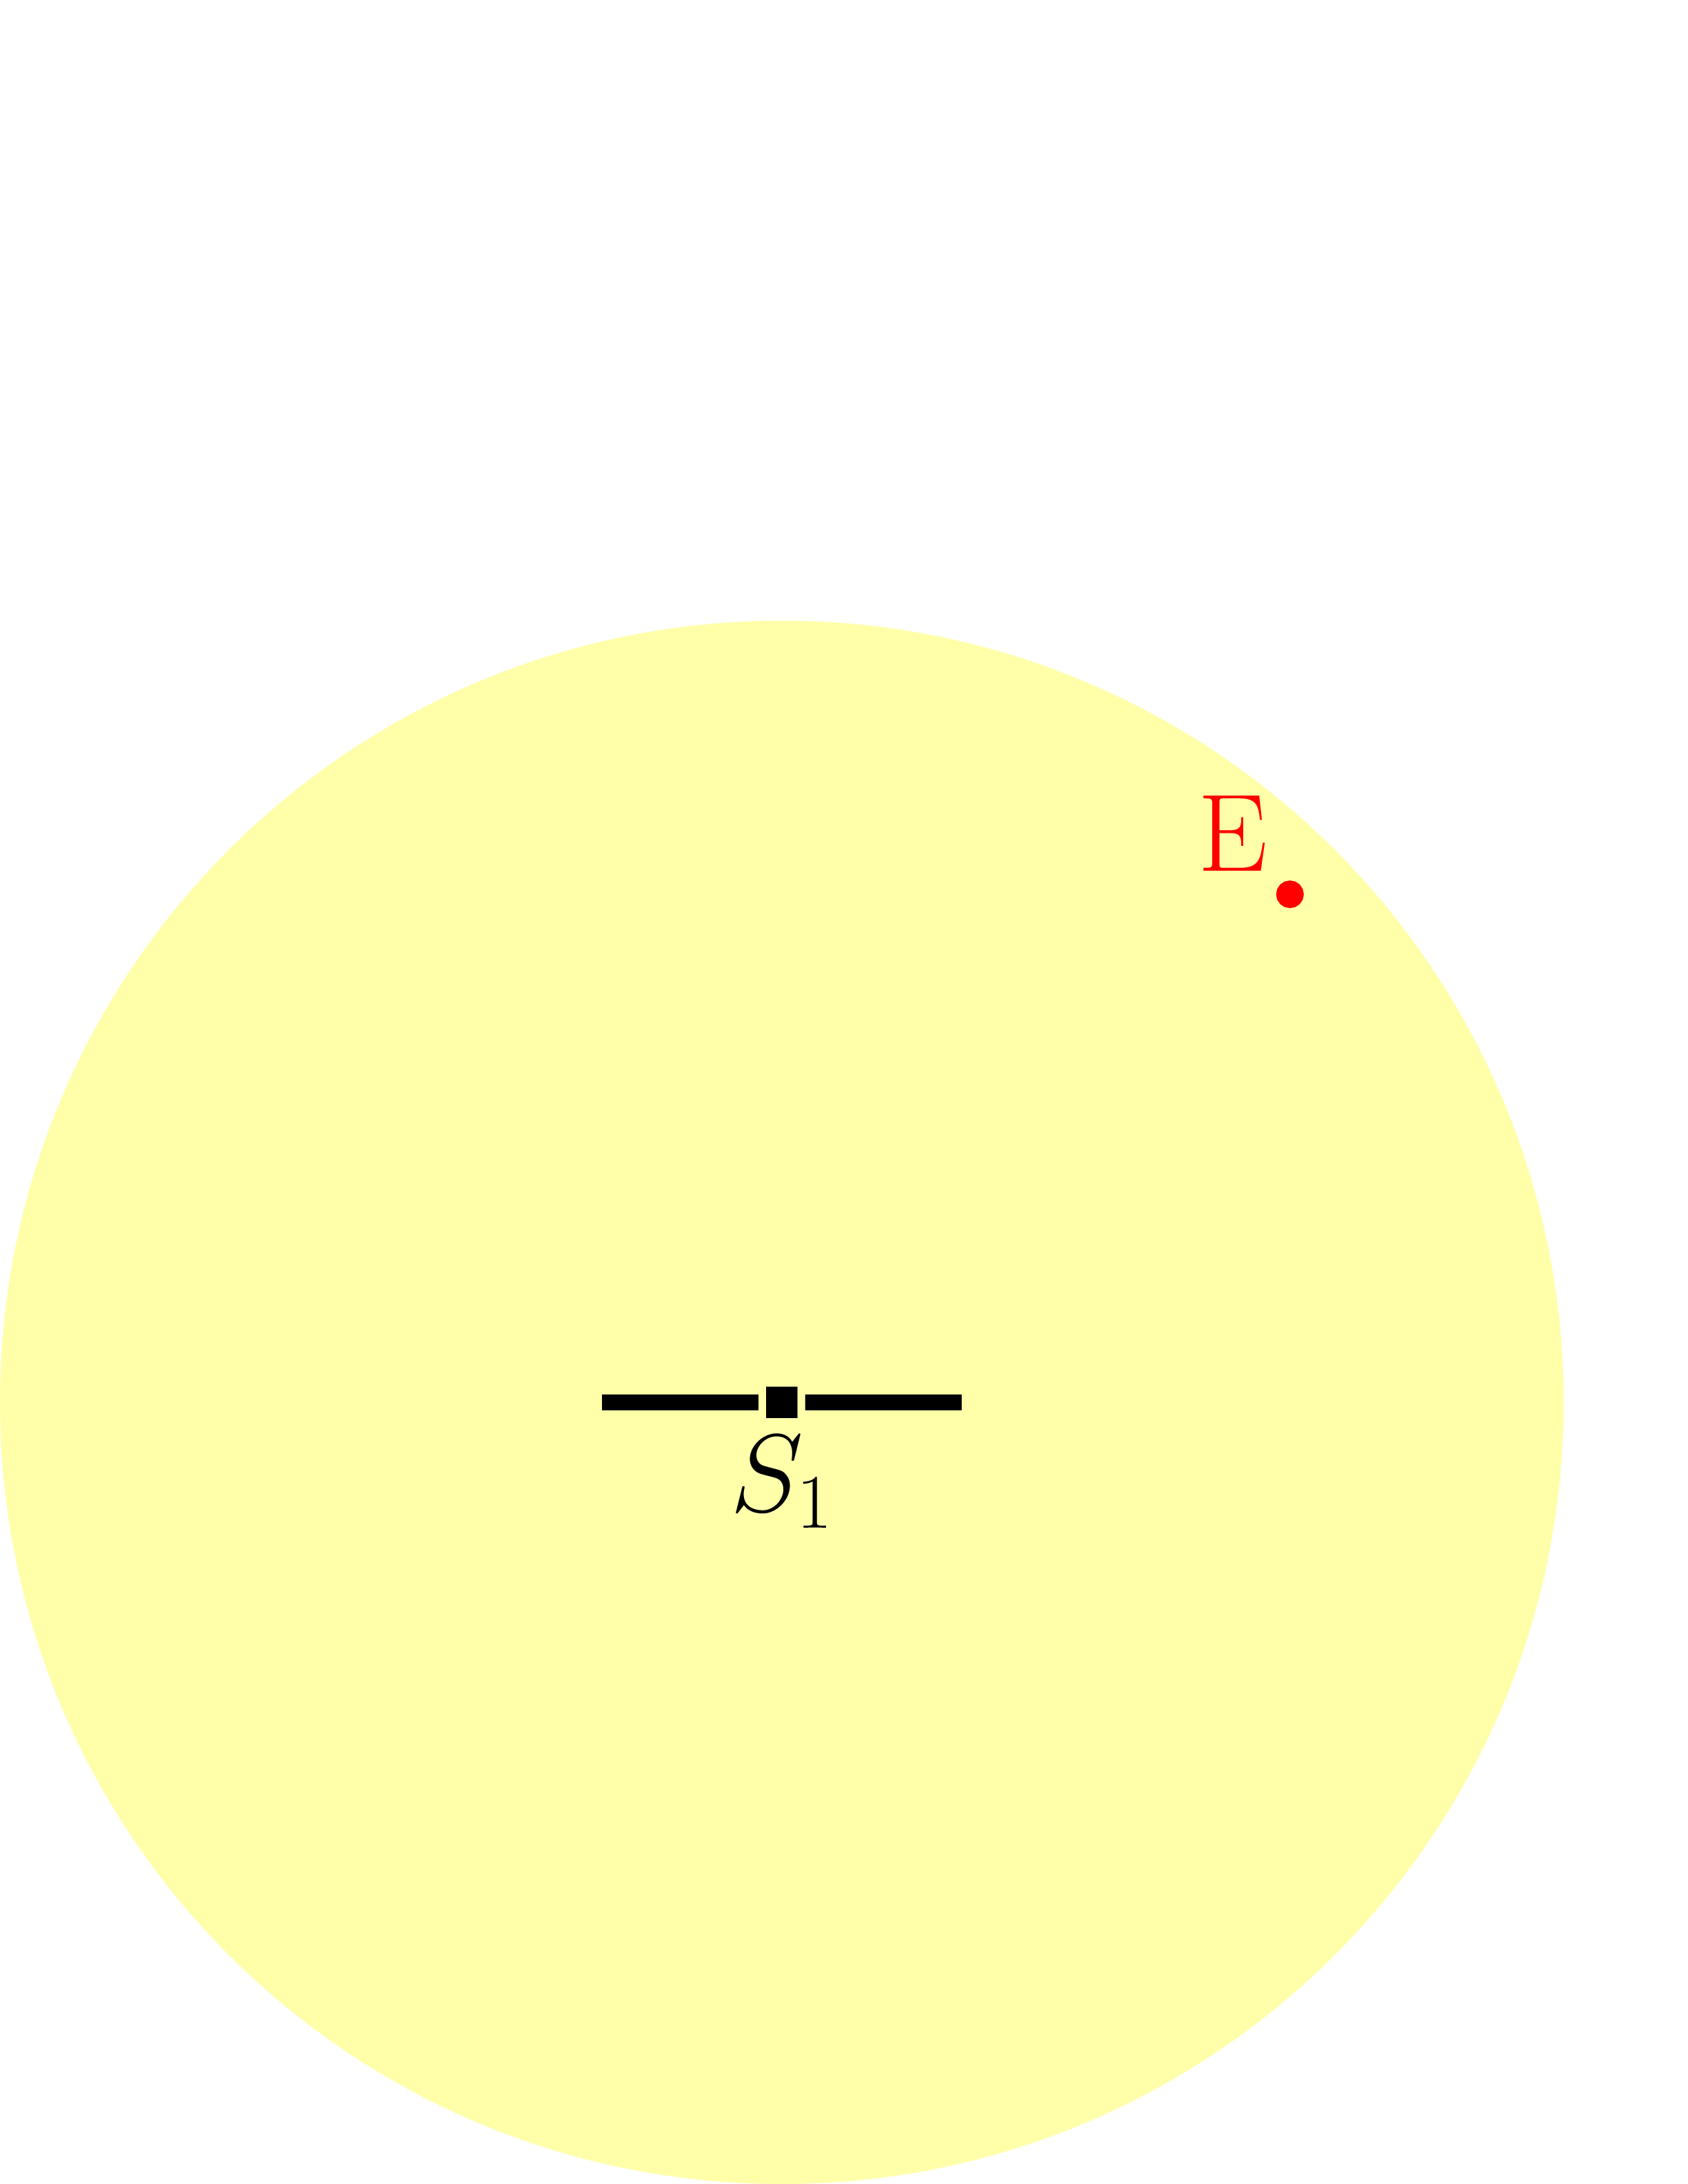

In [4]:
%%asy --root Images/gps_1_satellit
settings.render = 4;
size(20cm,0);
texpreamble("\usepackage[setpagesize=false]{hyperref}");

import fontsize;
defaultpen(fontsize(40));

pair z1=(0,0);
real r=1;
path s1_i=circle(z1,r);

fill(s1_i,lightred+lightgreen);
fill(shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill(shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill(box((-0.02,-0.02),(0.02,0.02)));
label("$S_1$",(0,0),S);

dot("E",(0.65,0.65),NW,red+10bp);

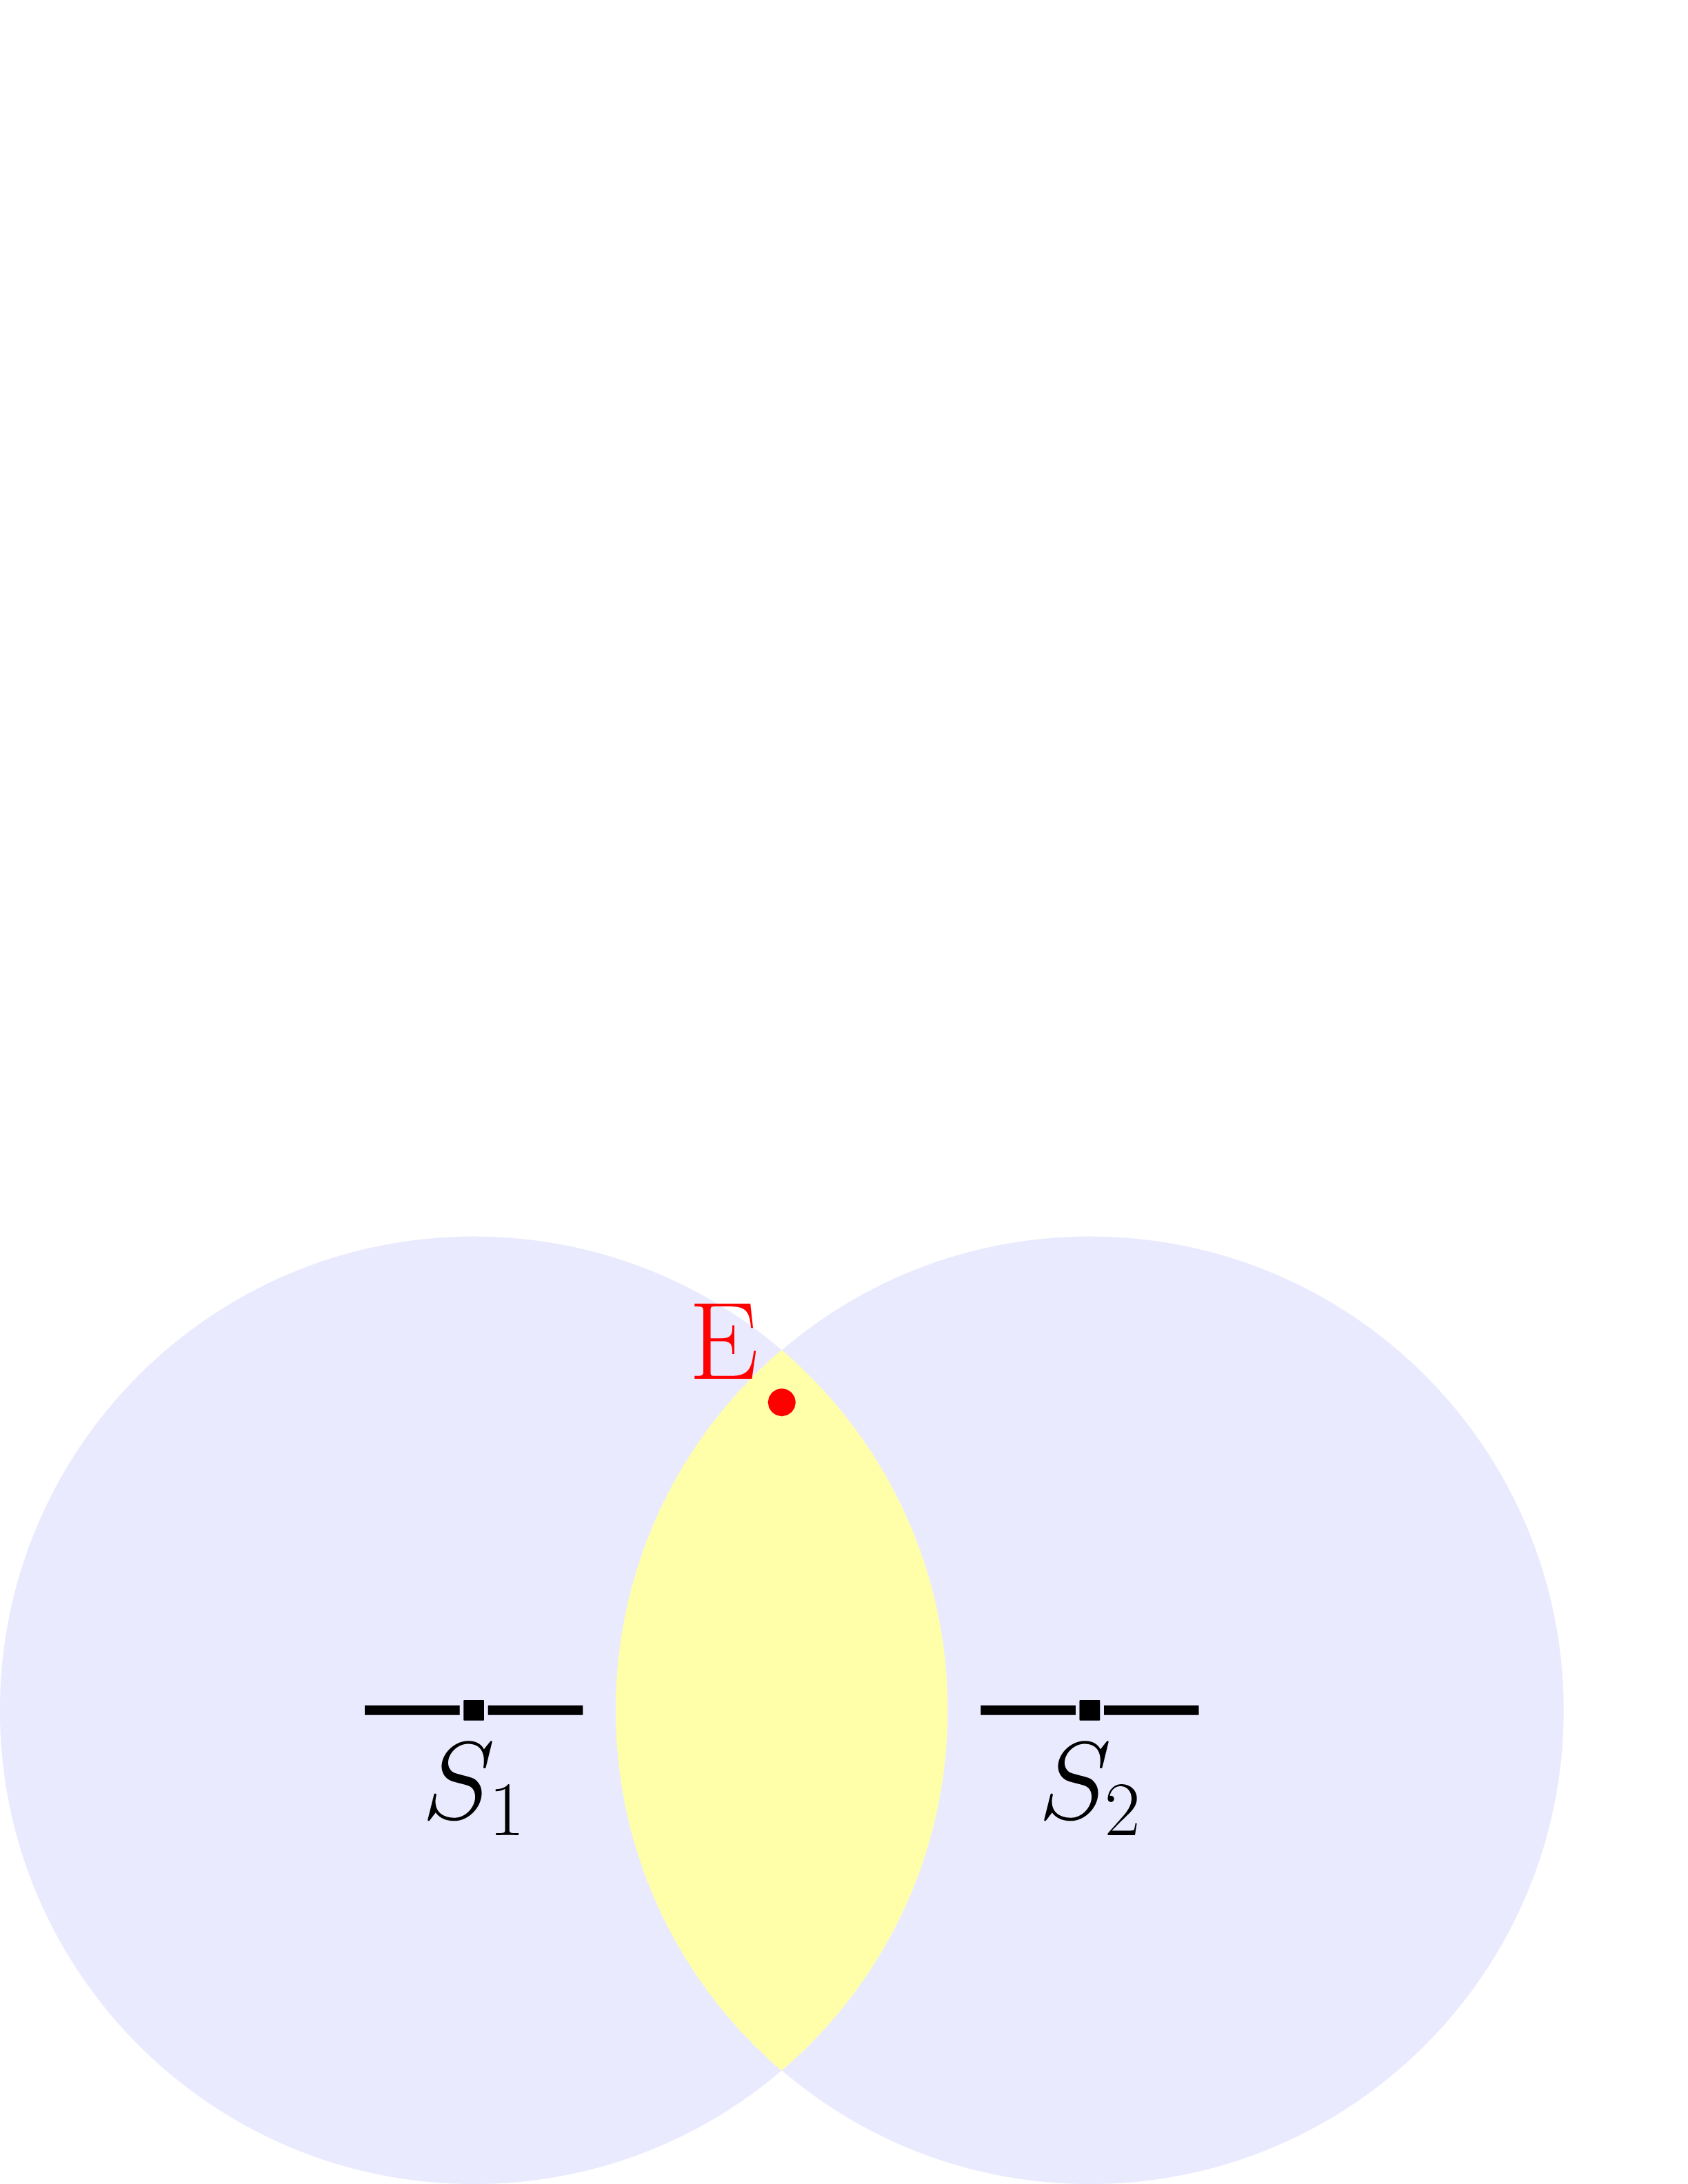

In [5]:
%%asy --root Images/gps_2_satelliten
settings.render = 4;
size(20cm,0);
texpreamble("\usepackage[setpagesize=false]{hyperref}");

import fontsize;
defaultpen(fontsize(40));

pair z1=(0,0);
pair z2=(1.3,0);
real r=1;
path s1=circle(z1,r);
path s2=circle(z2,r);

fill(s1, white+(lightblue*0.2));
fill(shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill(shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill(box((-0.02,-0.02),(0.02,0.02)));
draw(box((-0.02,-0.02),(0.02,0.02)));

fill(s2, white+(lightblue*0.2));
fill(shift(z2) * shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill(shift(z2) * shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill(shift(z2) * box((-0.02,-0.02),(0.02,0.02)));
draw(shift(z2) * box((-0.02,-0.02),(0.02,0.02)));

picture intersection;
fill(intersection,s1,lightred+lightgreen);
clip(intersection,s2);
add(intersection);

label("$S_1$",z1,S);
label("$S_2$",z2,S);

dot("E",(0.65,0.65),NW,red+10bp);

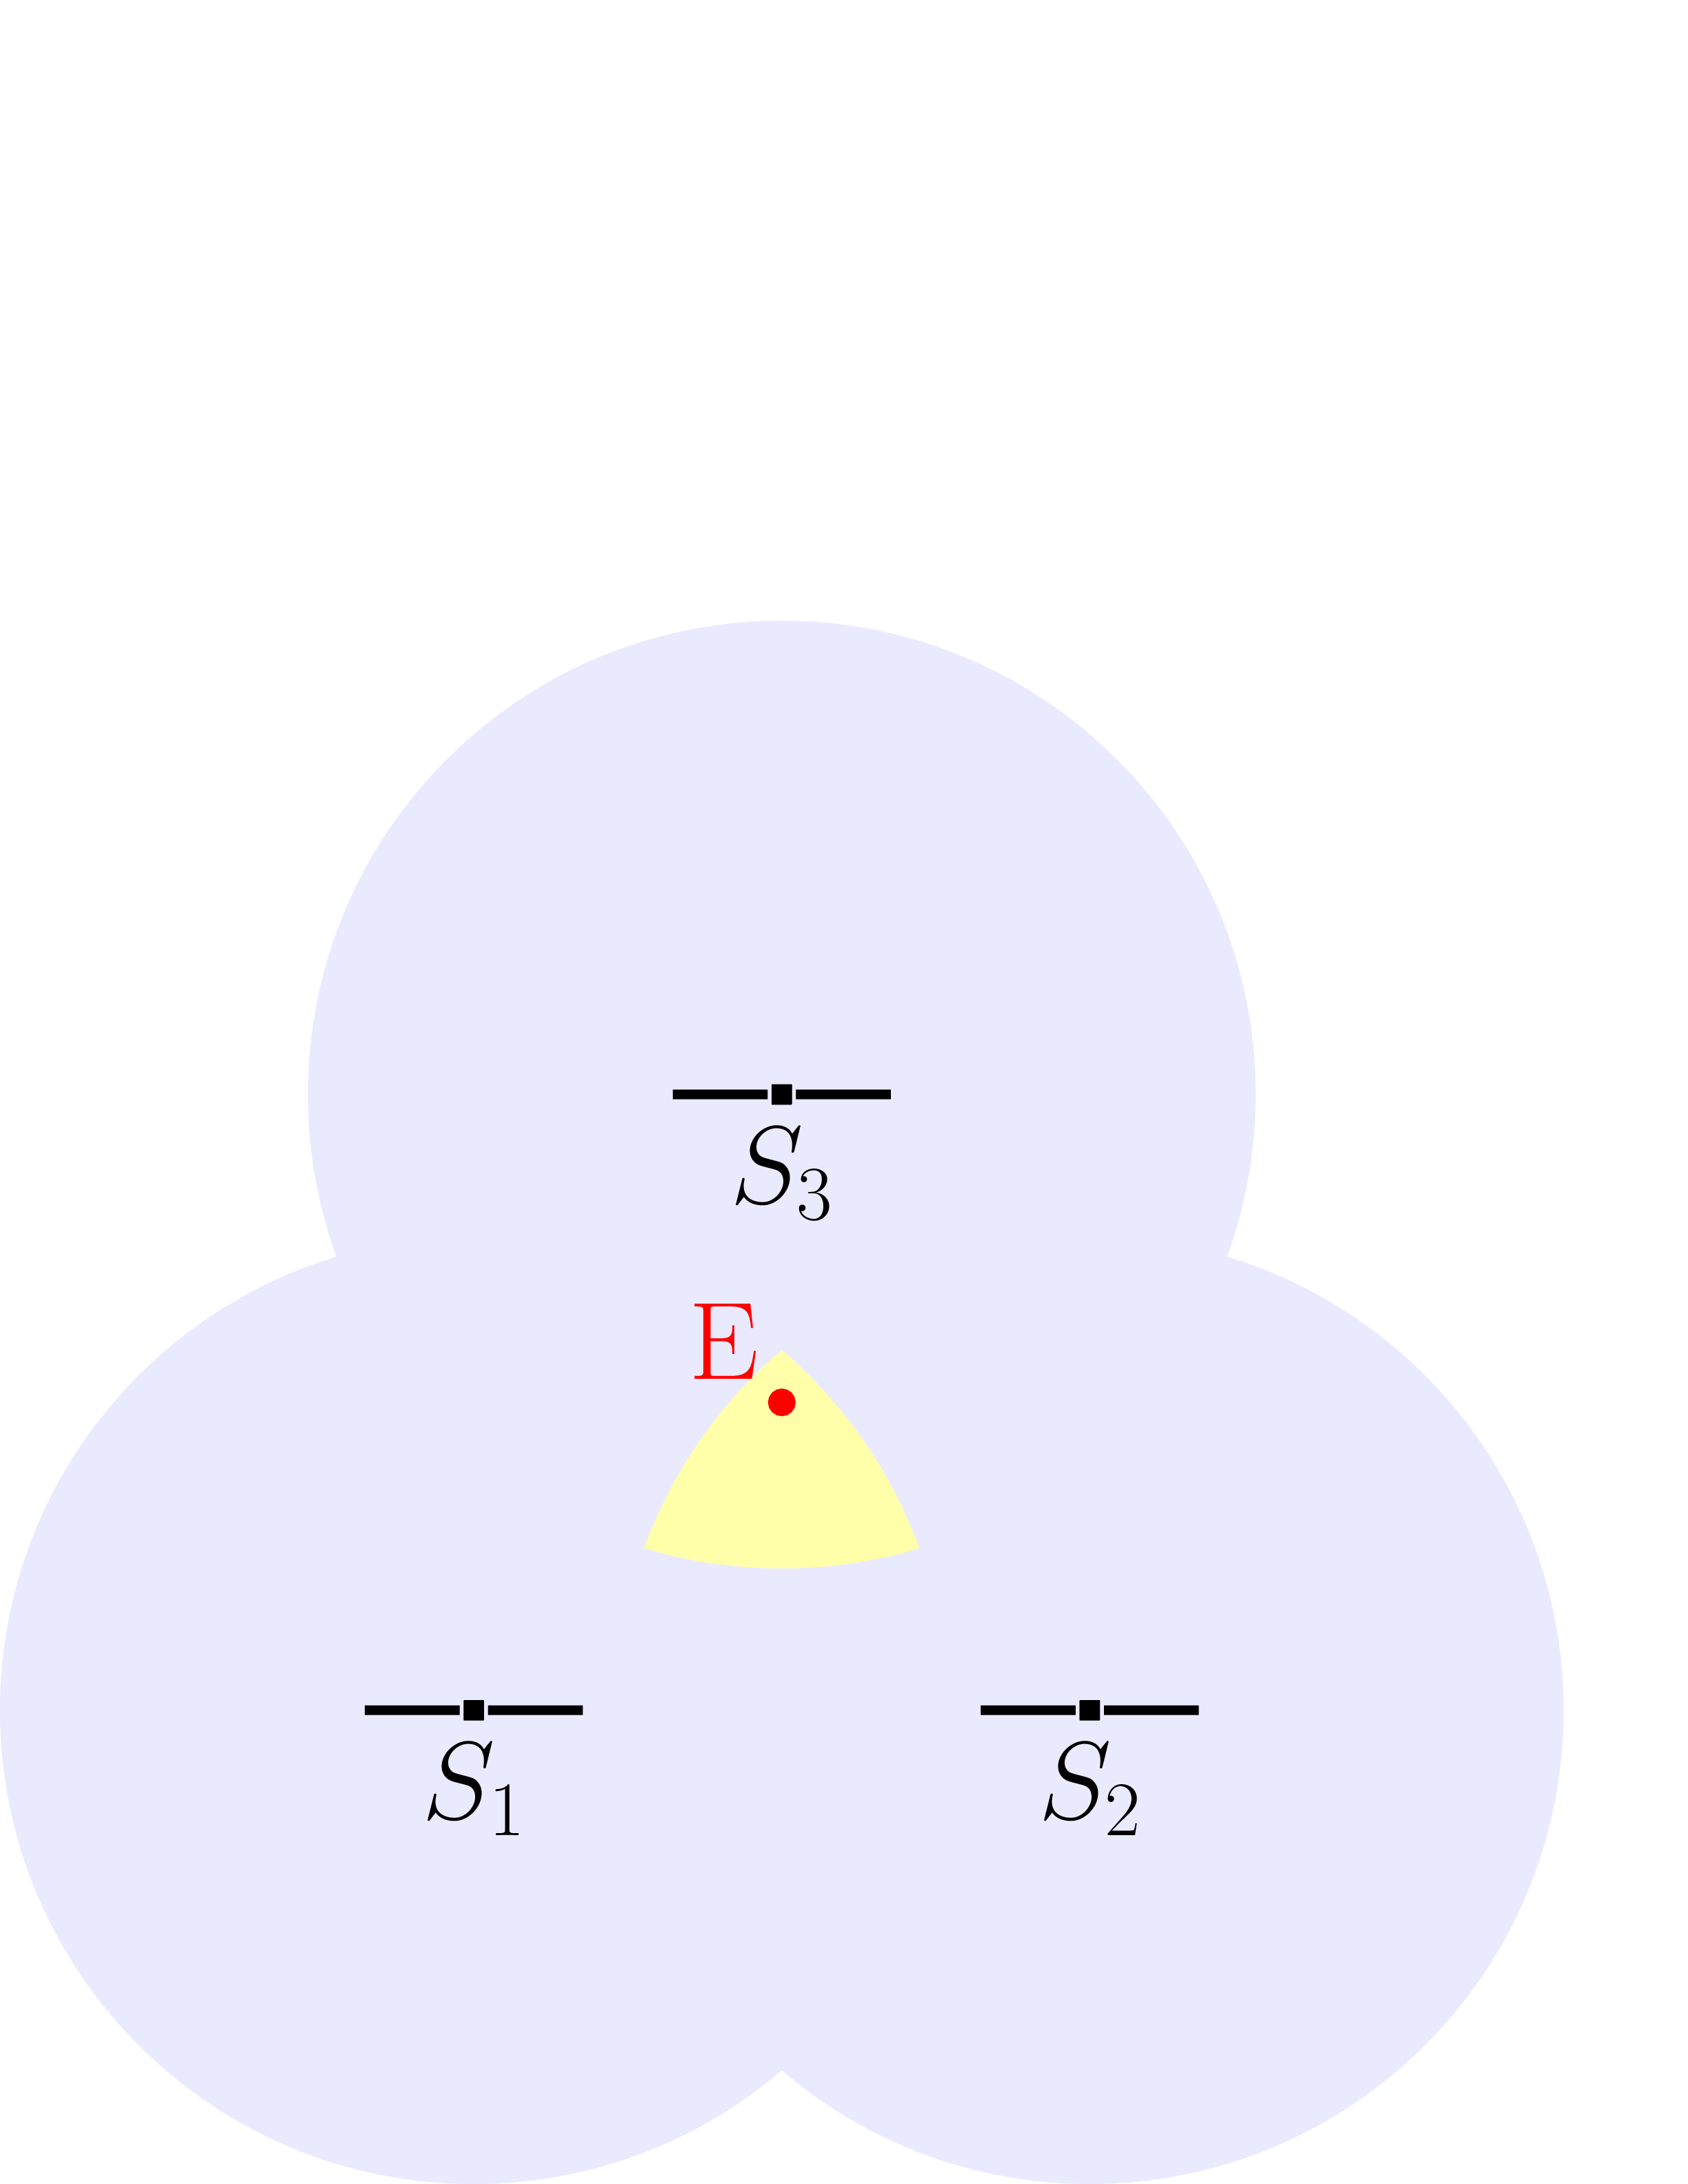

In [6]:
%%asy --root Images/gps_3_satelliten
settings.render = 4;
size(20cm,0);
texpreamble("\usepackage[setpagesize=false]{hyperref}");

import fontsize;
defaultpen(fontsize(40));

pair z1=(0,0);
pair z2=(1.3,0);
pair z3=(0.65,1.3);
real r=1;
path s1=circle(z1,r);
path s2=circle(z2,r);
path s3=circle(z3,r);

fill(s1, white+(lightblue*0.2));
fill(shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill(shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill(box((-0.02,-0.02),(0.02,0.02)));
draw(box((-0.02,-0.02),(0.02,0.02)));

fill(s2, white+(lightblue*0.2));
fill( shift(z2) * shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill( shift(z2) * shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill( shift(z2) * box((-0.02,-0.02),(0.02,0.02)));
draw(shift(z2) * box((-0.02,-0.02),(0.02,0.02)));

fill(s3, white+(lightblue*0.2));
fill( shift(z3) * shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill( shift(z3) * shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill( shift(z3) * box((-0.02,-0.02),(0.02,0.02)));
draw(shift(z3) * box((-0.02,-0.02),(0.02,0.02)));

picture intersection;
fill(intersection,s1,lightred+lightgreen);
clip(intersection,s2);
clip(intersection,s3);
add(intersection);

label("$S_1$",z1,S);
label("$S_2$",z2,S);
label("$S_3$",z3,S);

dot("E",(0.65,0.65),NW,red+10bp);

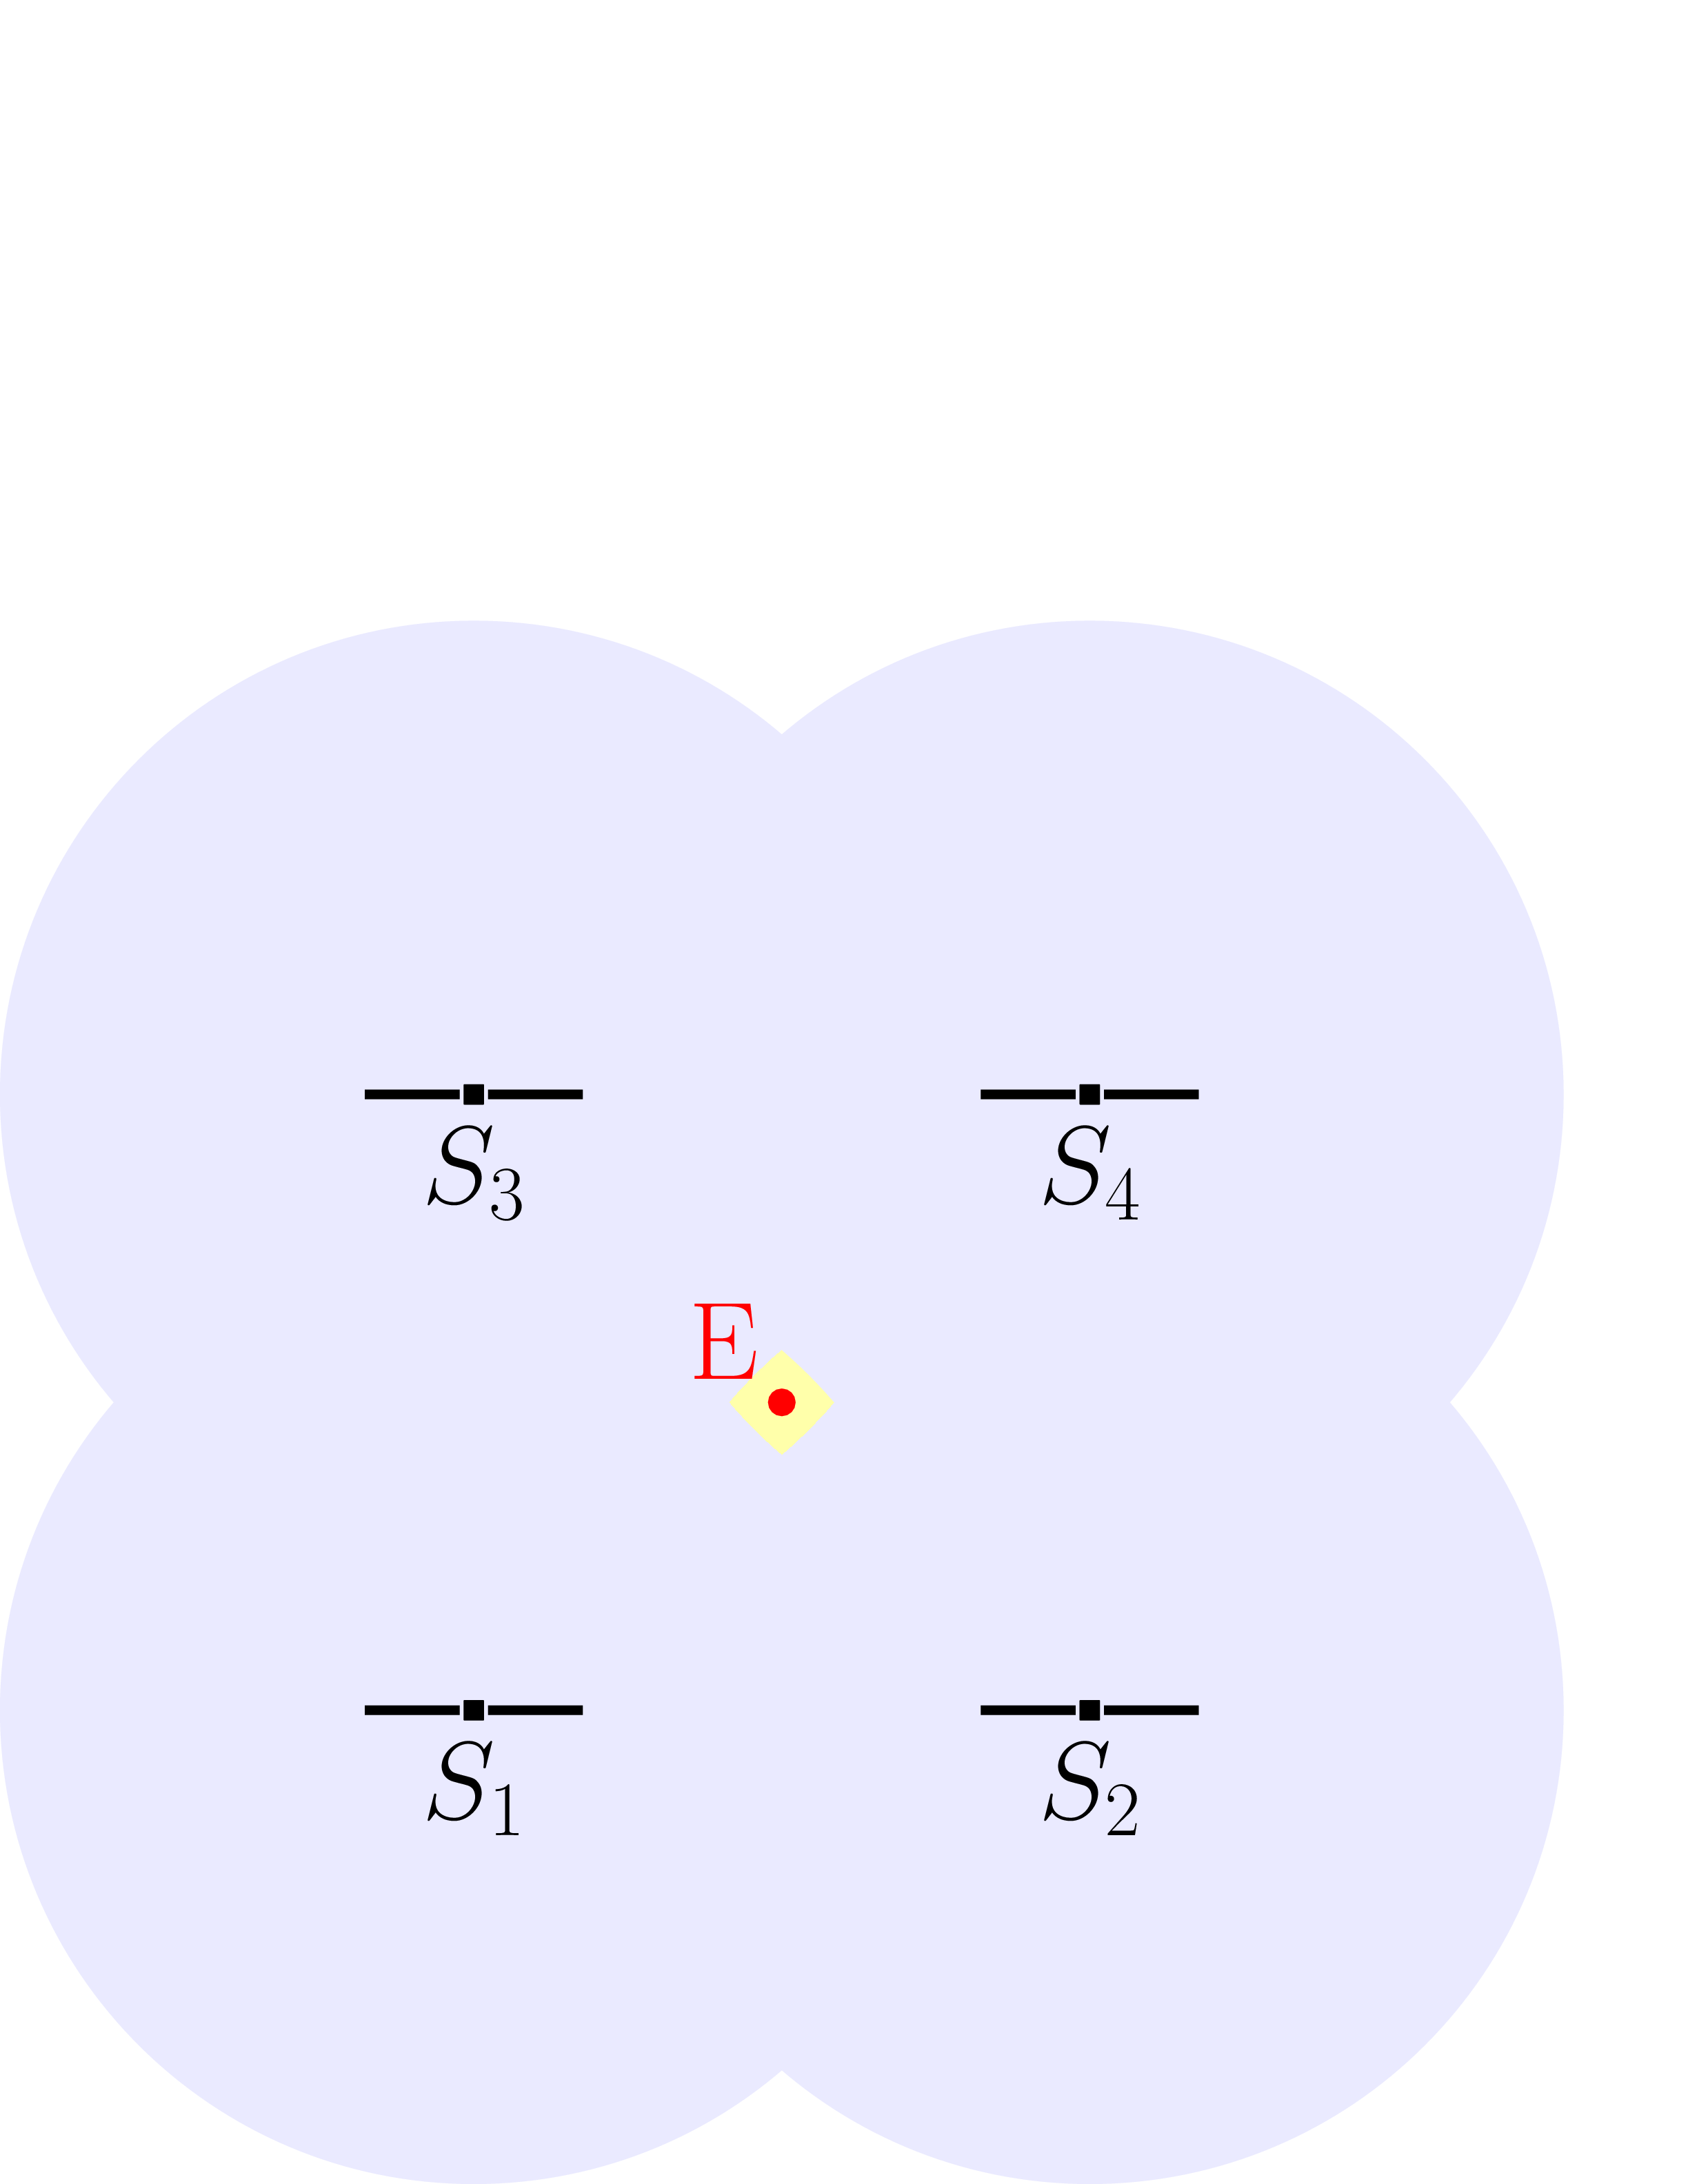

In [7]:
%%asy --root Images/gps_4_satelliten
settings.render = 4;
size(20cm,0);
texpreamble("\usepackage[setpagesize=false]{hyperref}");

import fontsize;
defaultpen(fontsize(40));

pair z1=(0,0);
pair z2=(1.3,0);
pair z3=(0,1.3);
pair z4=(1.3,1.3);
real r=1;
path s1=circle(z1,r);
path s2=circle(z2,r);
path s3=circle(z3,r);
path s4=circle(z4,r);

fill(s1, white+(lightblue*0.2));
fill(shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill(shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill(box((-0.02,-0.02),(0.02,0.02)));
draw(box((-0.02,-0.02),(0.02,0.02)));

fill(s2, white+(lightblue*0.2));
fill( shift(z2) * shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill( shift(z2) * shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill( shift(z2) * box((-0.02,-0.02),(0.02,0.02)));
draw(shift(z2) * box((-0.02,-0.02),(0.02,0.02)));

fill(s3, white+(lightblue*0.2));
fill( shift(z3) * shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill( shift(z3) * shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill( shift(z3) * box((-0.02,-0.02),(0.02,0.02)));
draw(shift(z3) * box((-0.02,-0.02),(0.02,0.02)));

fill(s4, white+(lightblue*0.2));
fill( shift(z4) * shift(0.03,-0.01) * box((0,0), (0.2,0.02)));
fill( shift(z4) * shift(-0.23,-0.01) * box((0.2,0.02), (0,0)));
fill( shift(z4) * box((-0.02,-0.02),(0.02,0.02)));
draw(shift(z4) * box((-0.02,-0.02),(0.02,0.02)));

picture intersection;
fill(intersection,s1,lightred+lightgreen);
clip(intersection,s2);
clip(intersection,s3);
clip(intersection,s4);
add(intersection);

label("$S_1$",z1,S);
label("$S_2$",z2,S);
label("$S_3$",z3,S);
label("$S_4$",z4,S);

dot("E",(0.65,0.65),NW,red+10bp);

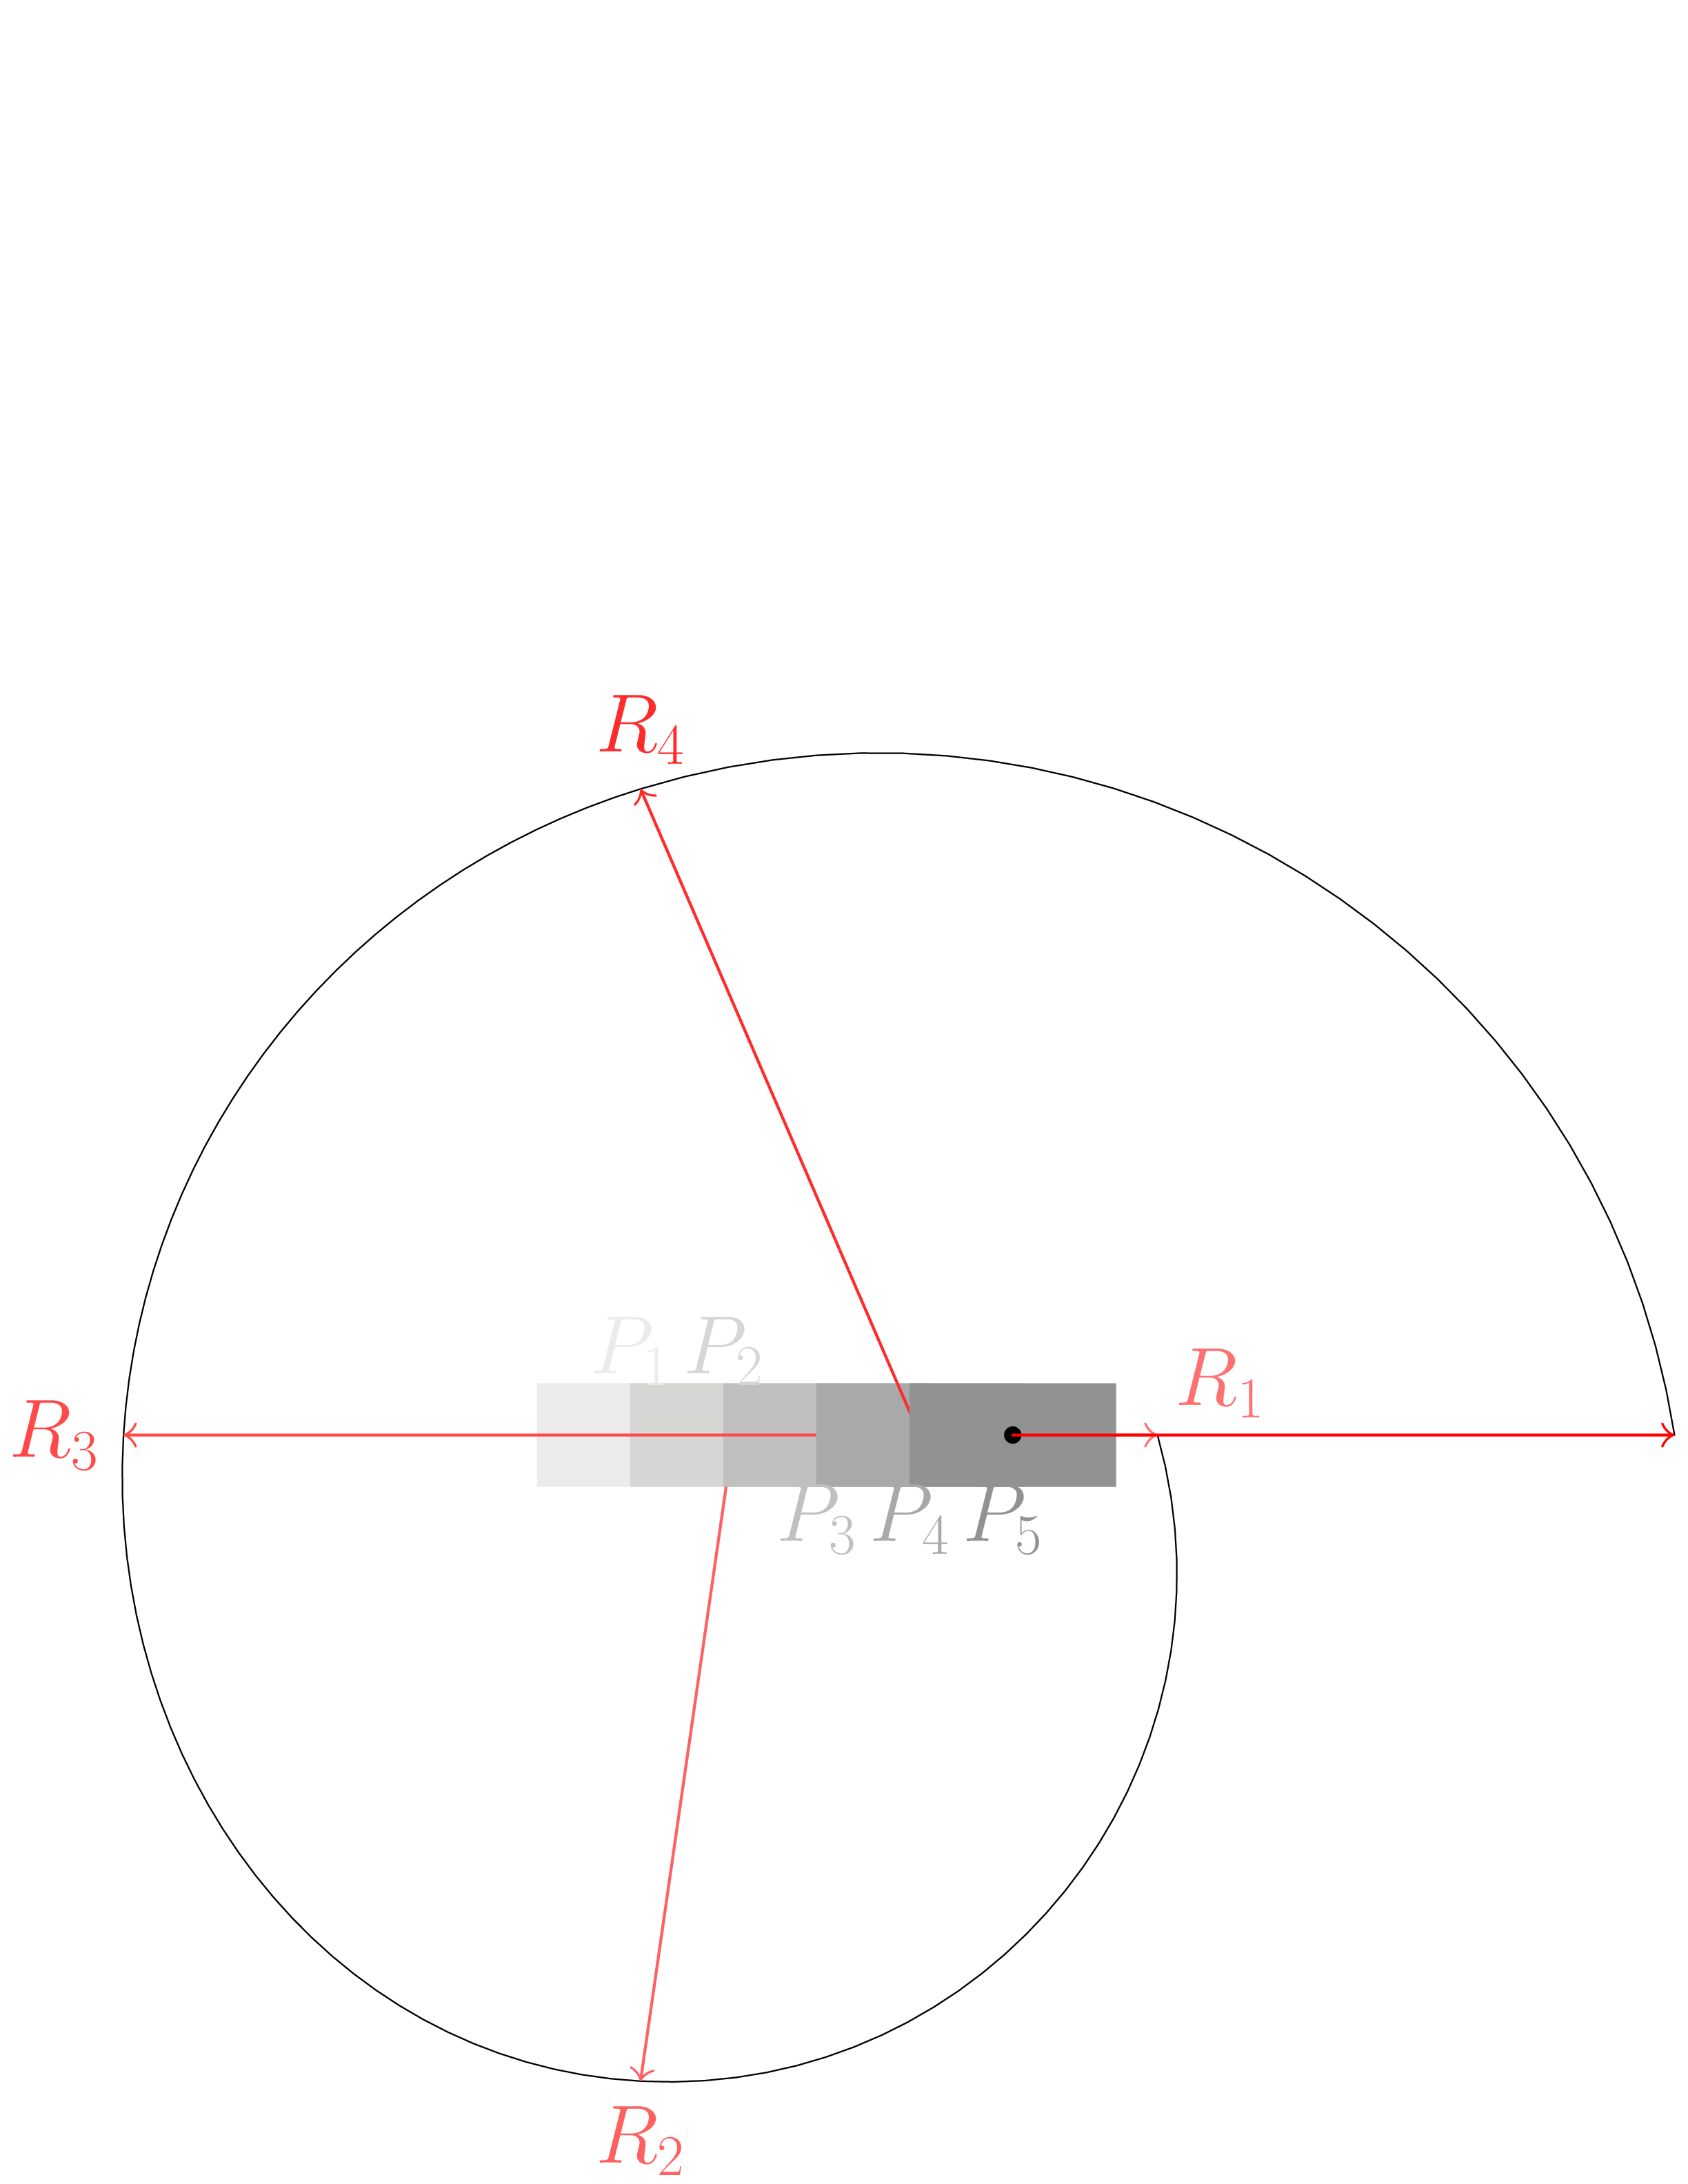

In [8]:
%%asy --root Images/bewegungskorrektur
settings.render = 4;
size(23cm,0);
\texpreamble("\usepackage[setpagesize=false]{hyperref}");

import fontsize;
defaultpen(fontsize(30));

pair p1 = (0,0);
pair p2 = (0.18,0);
pair p3 = (0.36,0);
pair p4 = (0.54,0);
pair p5 = (0.72,0);

path p = (4/4,0) .. (0,-5/4) .. (-4/4,0)
.. (0,5/4) .. (2,0);
draw(p);

fill(shift(p1) * box((-.2,-0.1),(.2,0.1)), .9*white);
fill(shift(p1) * scale(.02) * unitcircle);
draw(shift(p1) * scale(.02) * unitcircle, .9*white+linewidth(1.0pt), L=Label("$P_1$", align=(0,2)));
draw(p1--(4/4,0), .8*white+red+linewidth(1.0pt), arrow=ArcArrow(TeXHead), L=Label("$R_1$", position=EndPoint, NE));
fill(shift(p2) * box((-.2,-0.1),(.2,0.1)), .8*white);
fill(shift(p2) * scale(.02) * unitcircle);
draw(shift(p2) * scale(.02) * unitcircle, .8*white+linewidth(1.0pt), L=Label("$P_2$", align=(0,2)));
draw(p2--(0,-5/4), .6*white+red+linewidth(1.0pt), arrow=ArcArrow(TeXHead), L=Label("$R_2$", position=EndPoint, S));
fill(shift(p3) * box((-.2,-0.1),(.2,0.1)), .7*white);
fill(shift(p3) * scale(.02) * unitcircle);
draw(shift(p3) * scale(.02) * unitcircle, .7*white+linewidth(1.0pt), L=Label("$P_3$", align=(0,-2)));
draw(p3--(-4/4,0), .4*white+red+linewidth(1.0pt), arrow=ArcArrow(TeXHead), L=Label("$R_3$", position=EndPoint, W));
fill(shift(p4) * box((-.2,-0.1),(.2,0.1)), .6*white);
fill(shift(p4) * scale(.02) * unitcircle);
draw(shift(p4) * scale(.02) * unitcircle, .6*white+linewidth(1.0pt), L=Label("$P_4$", align=(0,-2)));
draw(p4--(0,5/4), .2*white+red+linewidth(1.0pt), arrow=ArcArrow(TeXHead), L=Label("$R_4$", position=EndPoint, N));
fill(shift(p5) * box((-.2,-0.1),(.2,0.1)), .5*white);
fill(shift(p5) * scale(.02) * unitcircle);
draw(shift(p5) * scale(.02) * unitcircle, .5*white+linewidth(1.0pt), L=Label("$P_5$", align=(0,-2)));
draw(p5--(2,0), .0*white+red+linewidth(1.0pt), arrow=ArcArrow(TeXHead), L=Label("$R_5$", position=EndPoint, E));

# Laserscanner Velodyne HDL-32e

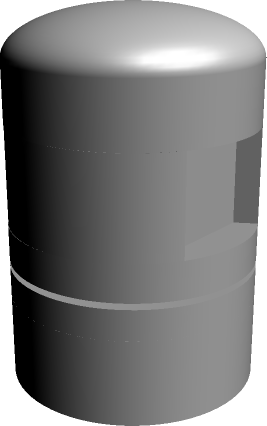

In [9]:
%%asy --root Images/velodyne
import solids;

surface velodyne() {
    real heightV=.8;
    path3 laserBase = path3((-0.4,0.7) -- (-0.5,sin(acos(-0.5))) .. (-1,0) .. (0,-1) .. (1,0) .. (0.5,sin(acos(0.5))) -- (0.4,0.7));

    surface top = shift(0.9Z) * scale(1,1,0.4) * unithemisphere;
    surface upperhead = surface(shift(0.4Z) * scale(1,1,0.5) * unitcylinder);
    surface laserEye = surface(shift(heightV/2*Z) * surface(unitcircle), shift(-heightV/2*Z) * extrude(laserBase --- cycle, heightV*Z), shift(-heightV/2*Z) * surface(unitcircle));
    surface lowerhead = surface(shift(-0.7Z) * scale(1,1,0.3) * unitcylinder, shift(-1Z) * surface(unitcircle));
    surface base = surface(shift(-0.75Z) * surface(unitcircle), shift(-1.7Z) * scale(1,1,0.95) * unitcylinder);
    surface velodyne = surface(top, upperhead, laserEye, lowerhead, base);

    return velodyne;
}

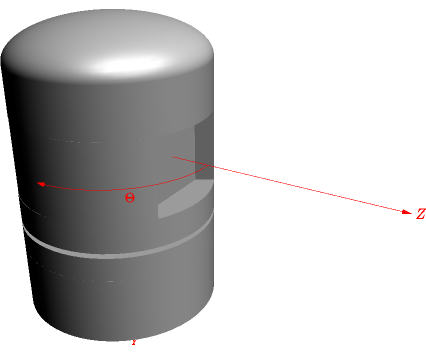

In [10]:
%%asy --root Images/velodyne_sc
import three;
import "Images/velodyne" as laserscanner;

//settings.render=16;
size(15cm);

draw(velodyne(), surfacepen=white);
draw(rotate(-90,X) * (O--2.5Y), red, Arrow3(emissive(red)), L=Label("$Y$", position=EndPoint));
draw(rotate(-90,X) * (O--3Z), red, Arrow3(emissive(red)), L=Label("$Z$", position=EndPoint));
draw(rotate(-90,X) * arc(c=(0,0,0),1.1Z, 1.1X), red, arrow=Arrow3(emissive(red)), L=Label("$\Theta$"));

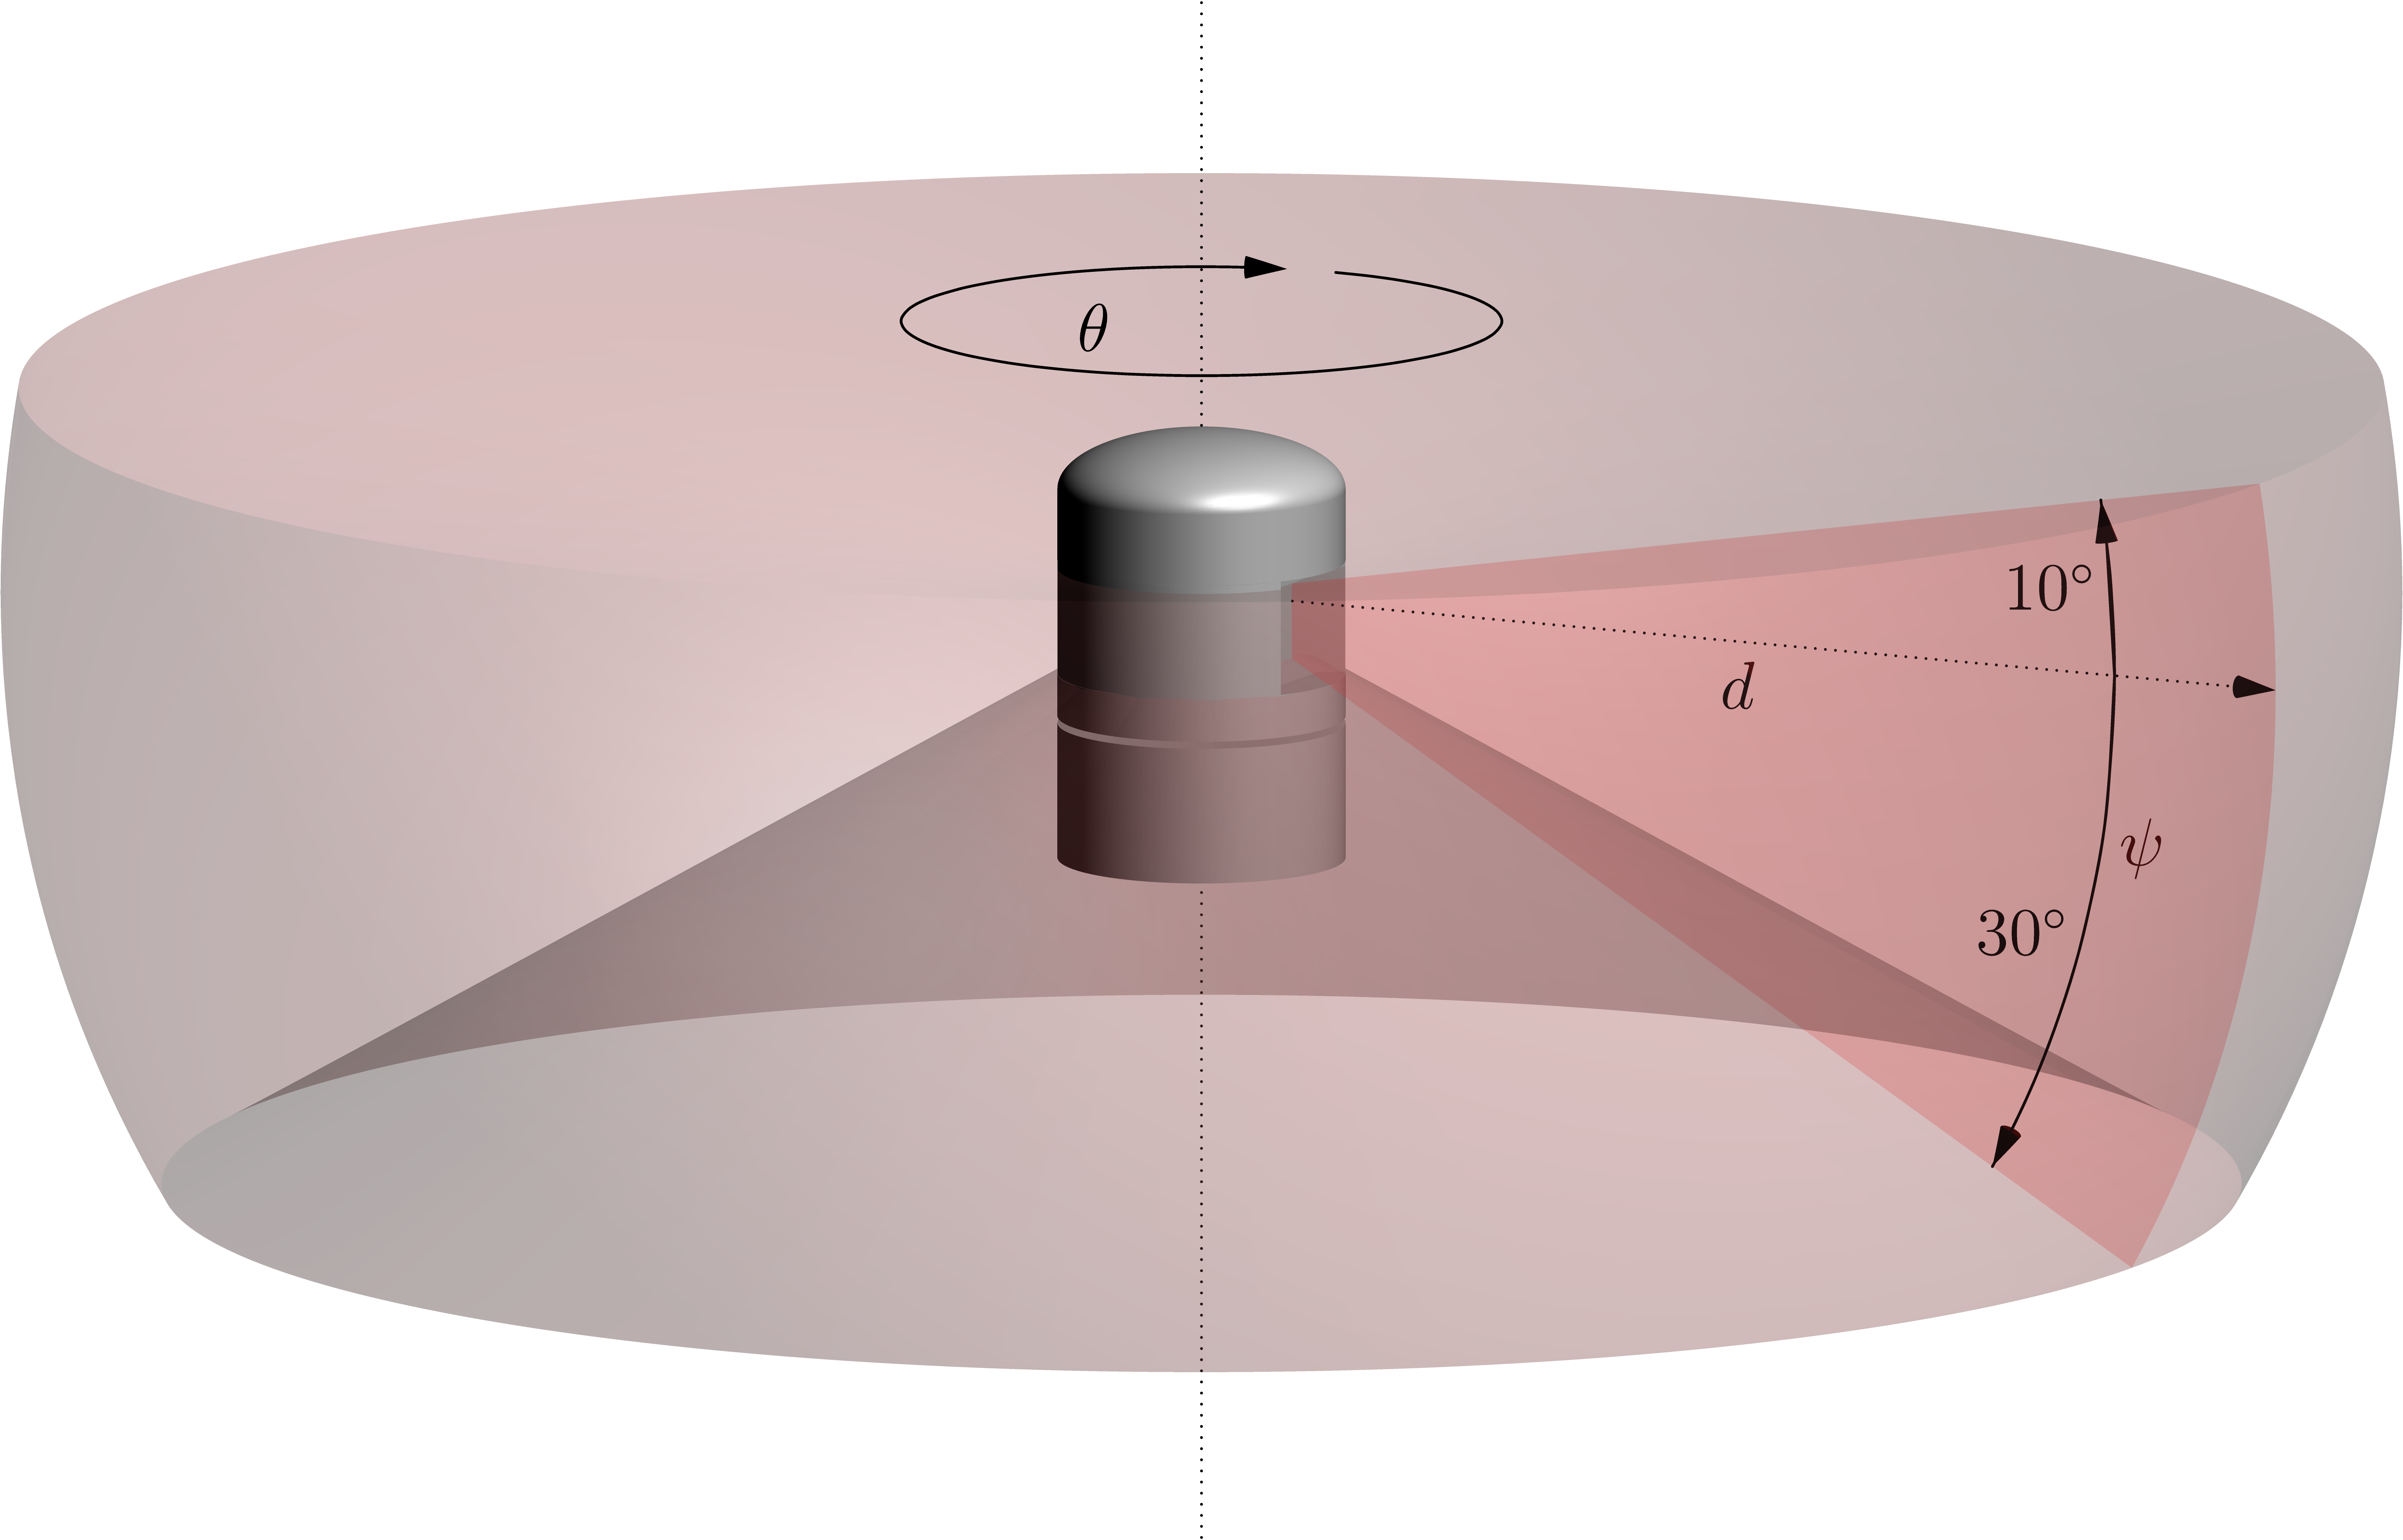

In [11]:
%%asy --root Images/velodyne_view
import three;
import "Images/velodyne" as laserscanner;
texpreamble("\usepackage{lmodern}");

size(15cm);
settings.render=16;
currentprojection=orthographic(8,4,1.5, center=true);

pen outside = white+opacity(1);
pen viewpoint = red+white;

draw(shift(-.02Z) * scale(.12,.12,.12) * velodyne(), outside);

path3 view = rotate(90,X) * path3((0,0) -- arc((0,0), 1, 10, -30) --- cycle);
draw(surface(rotate(90, Z) * view), emissive(red+black+opacity(0.2)));
draw(surface(revolution(view)), viewpoint+opacity(0.2));

draw(-.8Z -- .5Z, linetype(new real[] {0,4}));
draw(shift(0,0,.23) * path3(arc((0,0),.25, 180, -170)), black, arrow=Arrow3(emissive(black)), L=Label("$\theta$"));
draw(rotate(90,Z) * rotate(90,X) * path3(arc((0,0),.85, -30, 10)), L=Label("$\psi$", align=E));
draw(rotate(90,Z) * rotate(90,X) * path3(arc((0,0),.85, 0, 10)), arrow=Arrow3(emissive(black)), L=Label("$10^{\circ}$", align=W));
draw(rotate(90,Z) * rotate(90,X) * path3(arc((0,0),.85, 0, -30)), arrow=Arrow3(emissive(black)), L=Label("$30^{\circ}$", align=W));
draw(rotate(-90,X) * (O--1Z), linetype(new real[] {0,4}), arrow=Arrow3(emissive(black)), L=Label("$d$", align=S));

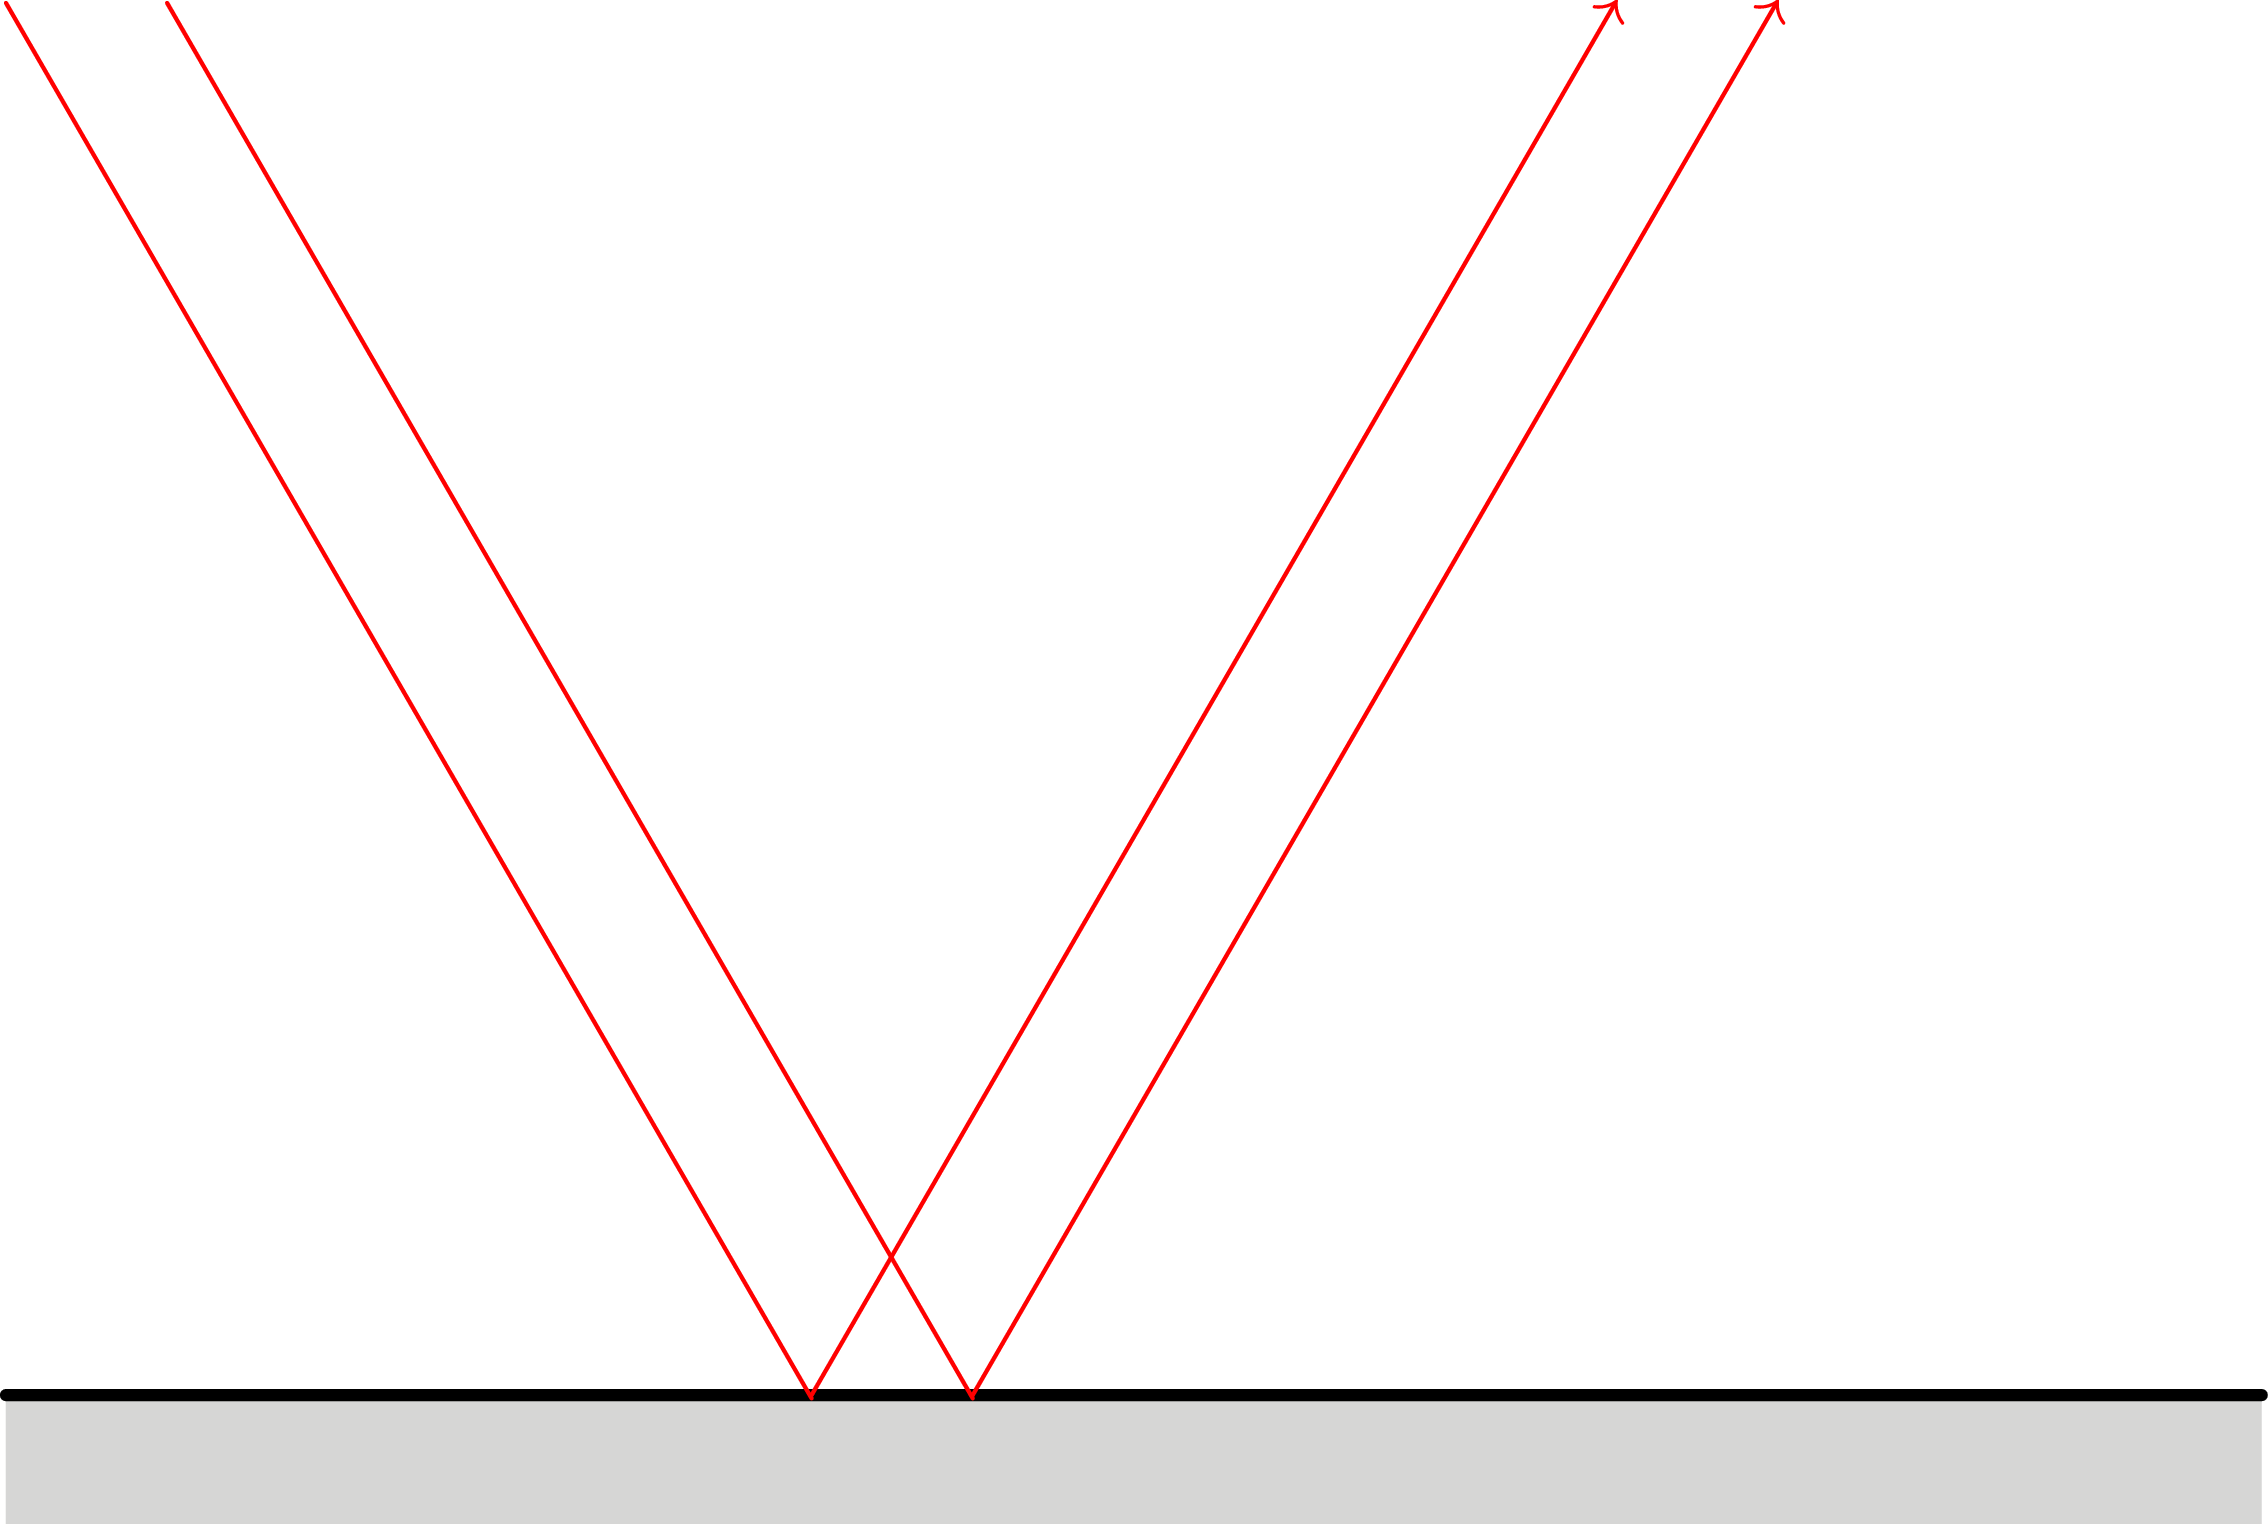

In [12]:
%%asy --root Images/reflexion
settings.render = 4;
size(20cm,0);
texpreamble("\usepackage[setpagesize=false]{hyperref}");

fill(box((0,0),(3.5,-.2)),.8white);
draw((0,0)--(3.5,0), linewidth(3.0pt));

draw(shift(0,2.16) * rotate(-60) * ((0,0)--(2.5,0)), red+linewidth(1.0pt));
draw(shift(1.25,0) * rotate(60) * ((0,0)--(2.5,0)), red+linewidth(1.0pt), arrow=ArcArrow(TeXHead));

draw(shift(0.25,2.16) * rotate(-60) * ((0,0)--(2.5,0)), red+linewidth(1.0pt));
draw(shift(1.5,0) * rotate(60) * ((0,0)--(2.5,0)), red+linewidth(1.0pt), arrow=ArcArrow(TeXHead));

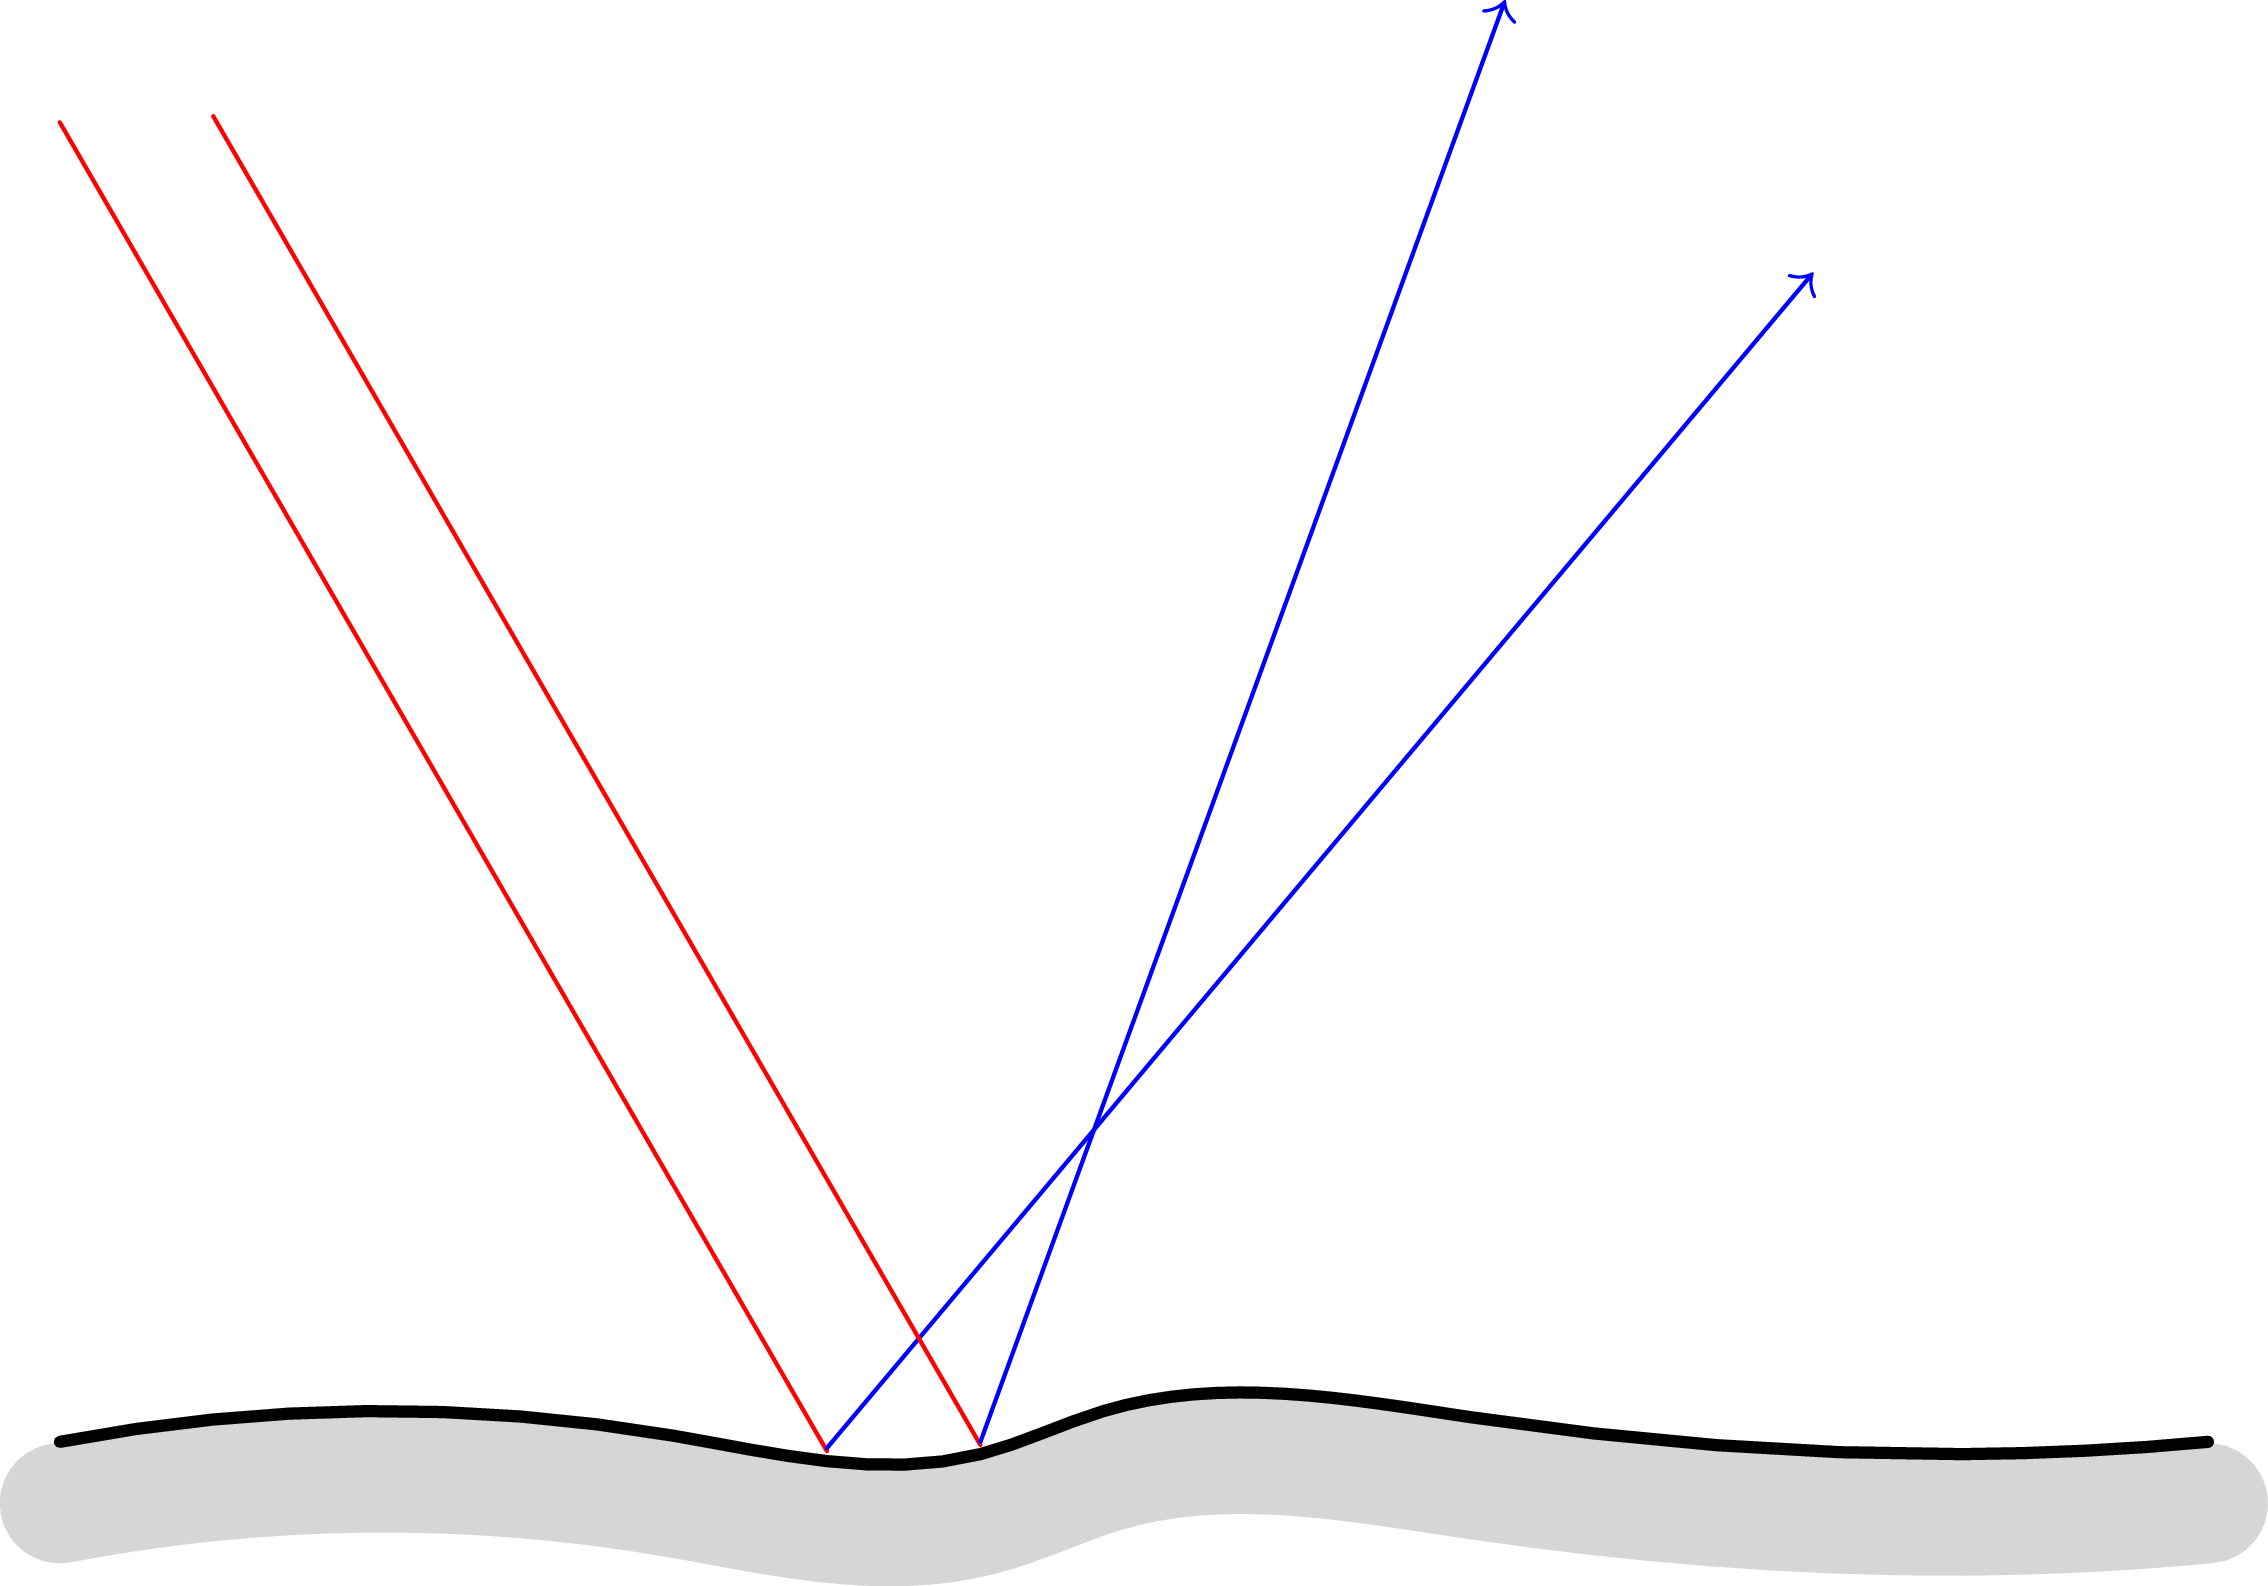

In [13]:
%%asy --root Images/diffuse_reflexion
settings.render = 4;
size(20cm,0);
texpreamble("\usepackage[setpagesize=false]{hyperref}");

path surf = (0,0) .. (1,.01) .. (1.5,-.02) .. (1.7,.05) .. (2.3,.04) .. (3.1,-.02) .. (3.5,0);
draw(shift(0,-.1) * surf, linewidth(30.0pt)+.8white);
draw(surf, linewidth(3.0pt));

draw(shift(0,2.15) * rotate(-60) * ((0,0)--(2.5,0)), red+linewidth(1.0pt));
draw(shift(1.25,-.01) * rotate(50) * ((0,0)--(2.5,0)), blue+linewidth(1.0pt), arrow=ArcArrow(TeXHead));

draw(shift(0.25,2.16) * rotate(-60) * ((0,0)--(2.5,0)), red+linewidth(1.0pt));
draw(shift(1.5,0) * rotate(70) * ((0,0)--(2.5,0)), blue+linewidth(1.0pt), arrow=ArcArrow(TeXHead));

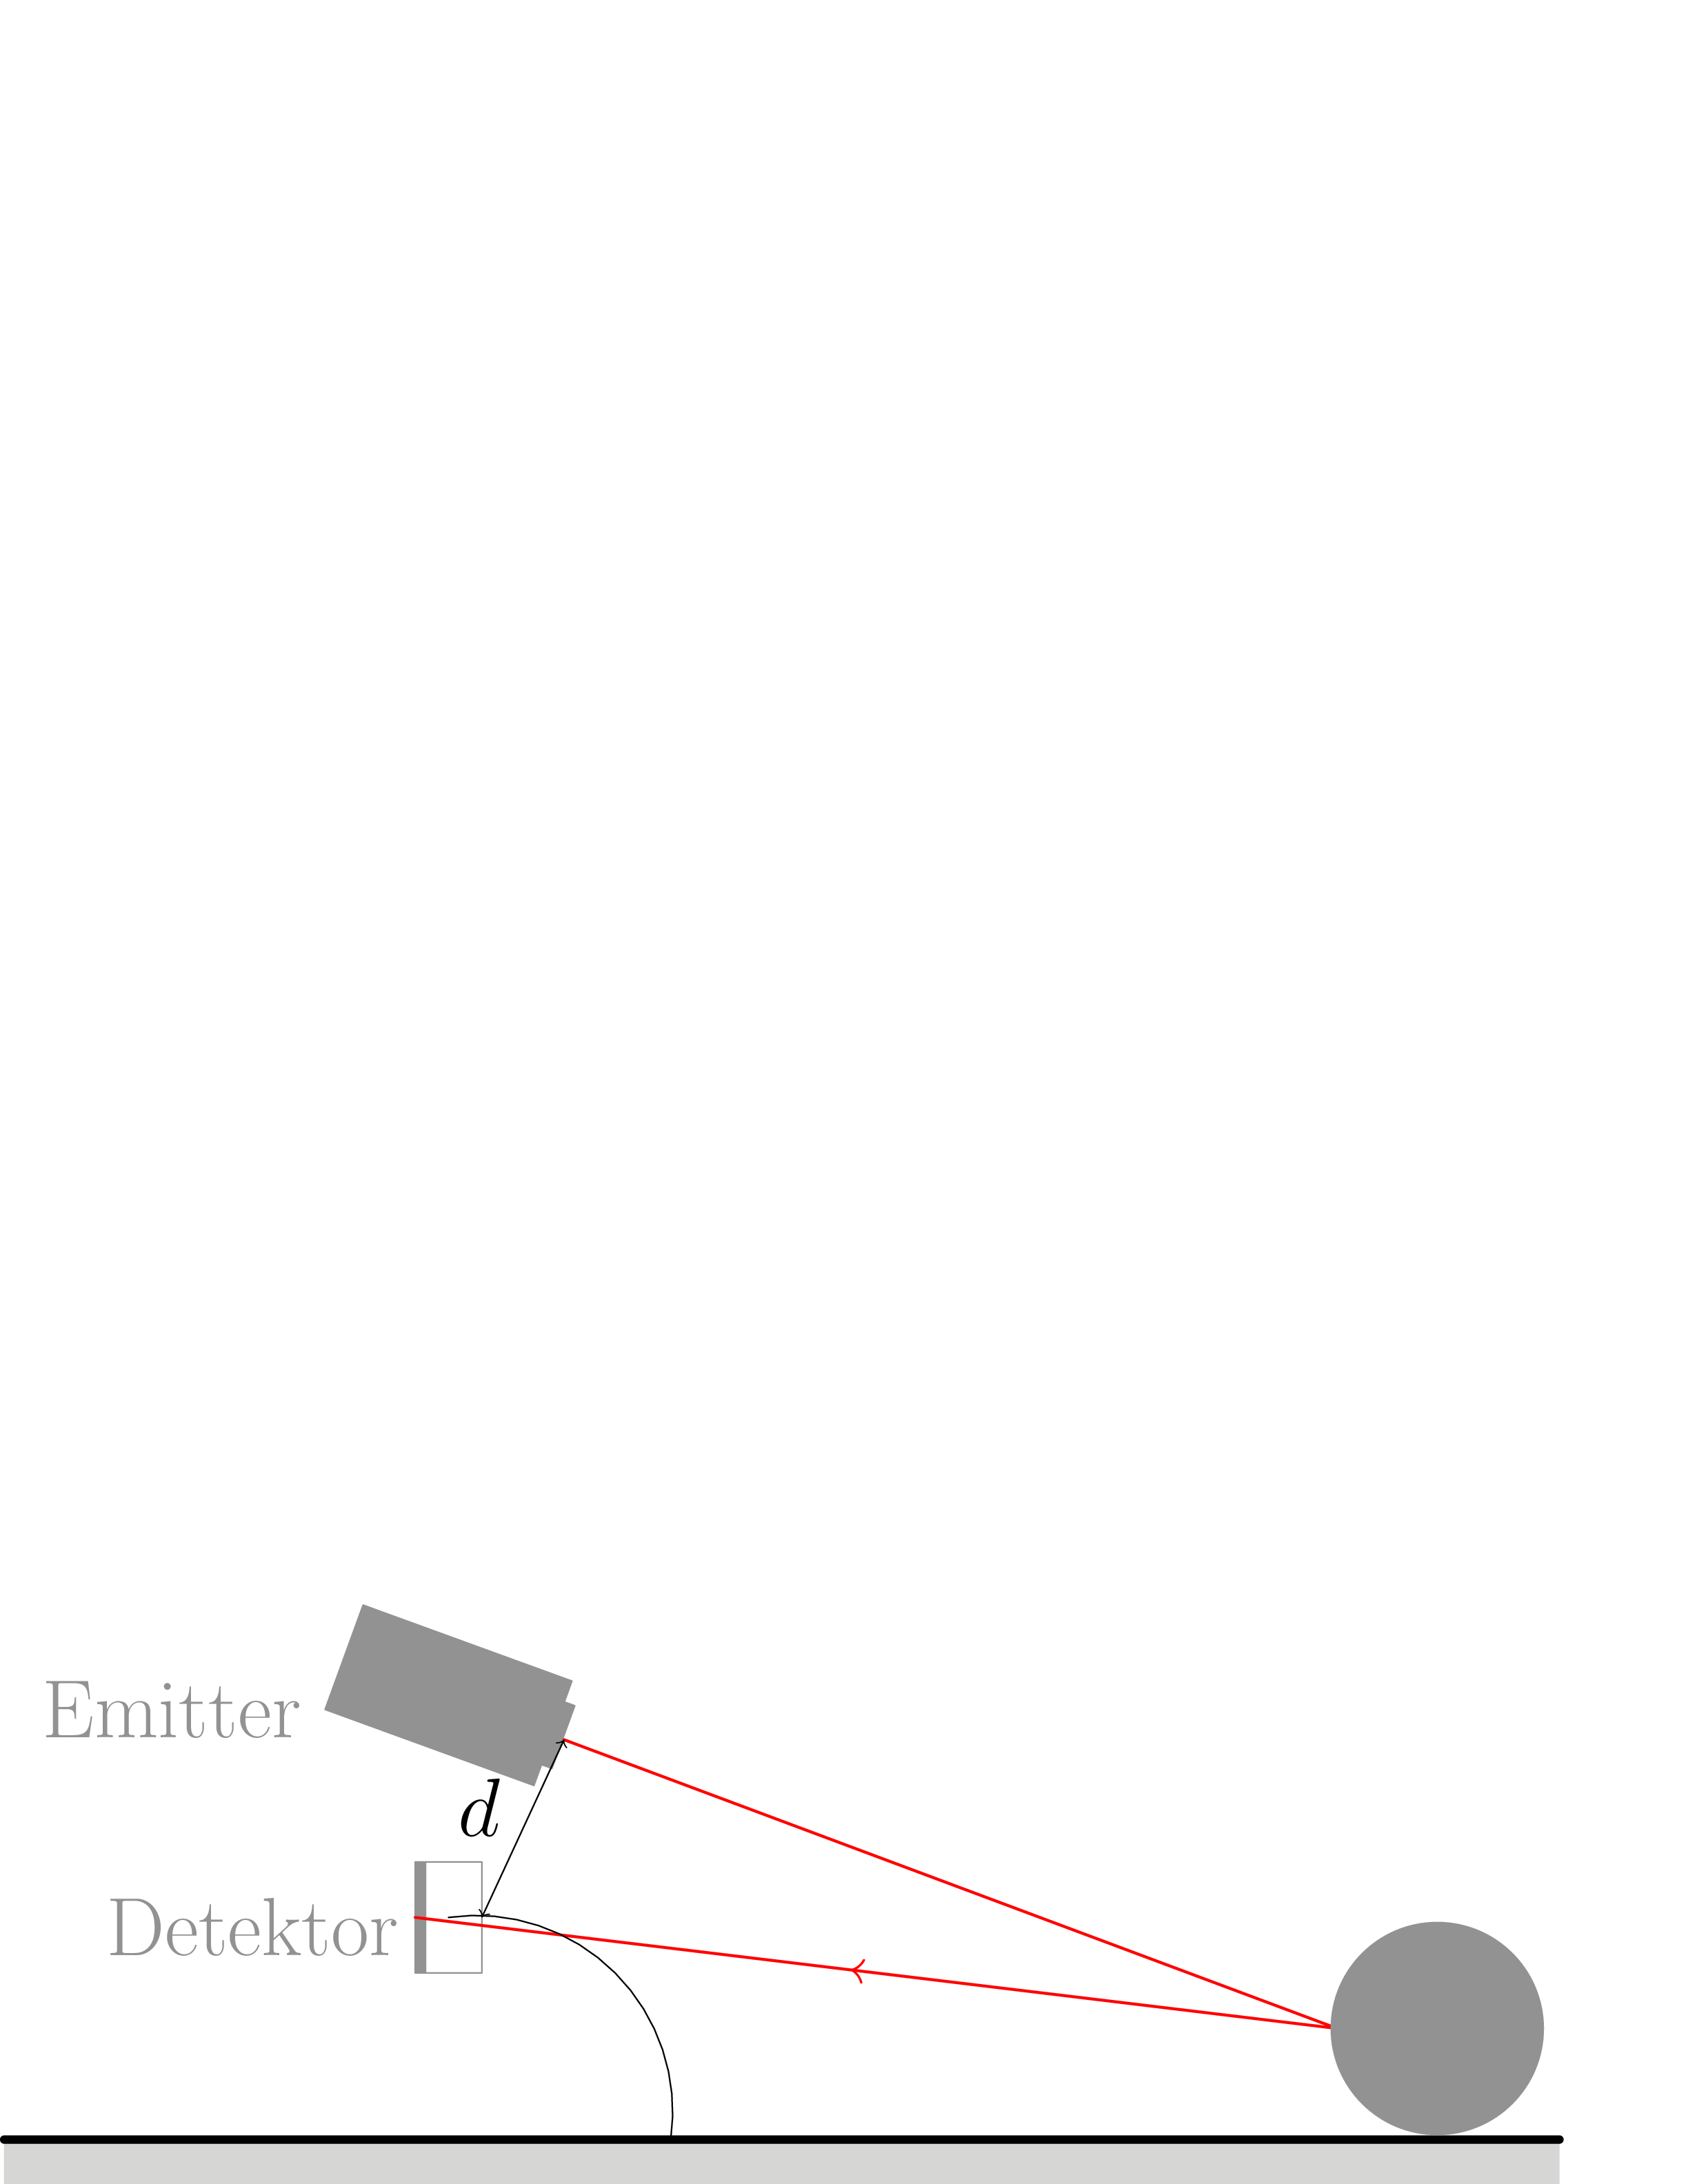

In [14]:
%%asy --root Images/triangulation
settings.render = 4;
size(20cm,0);
texpreamble("\usepackage[setpagesize=false]{hyperref}");

import fontsize;
defaultpen(fontsize(30));

pair pos_laser = (0,2);
pair pos_detektor = (0,1);

path laser = (-.5,-.25) -- (.5,-.25) -- (.5,-.15) -- (.55,-.15) -- (.55,.15) -- (.5,.15) -- (.5,.25) -- (-.5,.25) --cycle;
draw(shift(pos_laser) * rotate(-20) * laser, L=Label("Emitter", S, align=(-1,0)), .5white);
fill(shift(pos_laser) * rotate(-20) * laser, .5white);
path detektor = box((-.15,-.25),(.15,.25));
fill(shift(pos_detektor) * box((-.15,-.25),(-.1,.25)), .5white);
draw(shift(pos_detektor) * detektor, L=Label("Detektor", S), .5white);

pair p0 = (-.15,1);
pair p1 = (.52,1.8);
pair p2 = (4,.5);

draw(p1 -- p2 -- p0, red+linewidth(1.0pt), arrow=Arrow(TeXHead,Relative(.75)));
draw(shift(pos_detektor) * (.15,0) -- p1, L=Label("$d$"), arrow=Arrows(TeXHead),WNW);

fill(box((-2,0),(5,-.2)),.8white);
draw((-2,0)--(5,0), linewidth(3.0pt));
fill(shift((.45,0)) * shift(p2) * scale(.48) * unitcircle, .5white);

draw(shift(0,1) * rotate(-90) * ((0,0) .. (.25,.75) .. (1,1)));